#Machine Learning Project Code

#Predictive Maintenance Dataset

#Group 11

#Team Members - 



1.  Aniket Sakharkar
2.  Mayur Mahanta
3.  Jwalit Shah
4.  Dev Patel


#1. Data Collection and Processing
#Importing the Data Set

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("ai4i2020.csv")
df

Saving ai4i2020.csv to ai4i2020 (2).csv


UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 14 columns]

In [261]:
#checking our data dimension
df.shape

(10000, 14)

In [262]:
#concise summary of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [263]:
#creating a new dataframe to isolated raw data for visualizaition purpose
#and model data for the model building phase
Model_data=df.copy()
Model_data

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  
0       0    0    0    0    0  
1       0    0    0    0    0  
2       0    0    0    0    0  
3       0    0    0    0    0  
4       0    0    0    0    0  
...   ...  ...  ...  ...  ...  
9995    0    0    0    0    0  
9996    0    0    0    0    0  
9997    0    0    0    0    0  
9998    0    0    0    0    0  
9999    0    0    0    0    0  

[10000 rows x 14 columns]

In [264]:
Model_data_drop = Model_data.drop(['Process temperature [K]','Rotational speed [rpm]'],axis = 1)
Model_data_drop

UDI Product ID Type  Air temperature [K]  Torque [Nm]  \
0         1     M14860    M                298.1         42.8   
1         2     L47181    L                298.2         46.3   
2         3     L47182    L                298.1         49.4   
3         4     L47183    L                298.2         39.5   
4         5     L47184    L                298.2         40.0   
...     ...        ...  ...                  ...          ...   
9995   9996     M24855    M                298.8         29.5   
9996   9997     H39410    H                298.9         31.8   
9997   9998     M24857    M                299.0         33.4   
9998   9999     H39412    H                299.0         48.5   
9999  10000     M24859    M                299.0         40.2   

      Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  
0                   0                0    0    0    0    0    0  
1                   3                0    0    0    0    0    0  
2                   5                0    0    0    0    0    0  
3                   7                0    0    0    0    0    0  
4                   9                0    0    0    0    0    0  
...               ...              ...  ...  ...  ...  ...  ...  
9995               14                0    0    0    0    0    0  
9996               17                0    0    0    0    0    0  
9997               22                0    0    0    0    0    0  
9998               25                0    0    0    0    0    0  
9999               30                0    0    0    0    0    0  

[10000 rows x 12 columns]

In [265]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(Model_data['Type'])
 
# printing label
label

array([2, 1, 1, ..., 2, 0, 2])

In [266]:
# removing the column 'Purchased' from df
# as it is of no use now.
Model_data.drop("Type", axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'Purchased'
Model_data["Type"] = label

In [267]:
label

array([2, 1, 1, ..., 2, 0, 2])

Changed Type Feature which consisted of: 
[ Low, Medium, High ]

To numerical values depicting the same:
[ 0, 1, 2 ]

In [268]:
#model data after label encoding (Converting Categorical to Numerical Data)
Model_data

UDI Product ID  Air temperature [K]  Process temperature [K]  \
0         1     M14860                298.1                    308.6   
1         2     L47181                298.2                    308.7   
2         3     L47182                298.1                    308.5   
3         4     L47183                298.2                    308.6   
4         5     L47184                298.2                    308.7   
...     ...        ...                  ...                      ...   
9995   9996     M24855                298.8                    308.4   
9996   9997     H39410                298.9                    308.4   
9997   9998     M24857                299.0                    308.6   
9998   9999     H39412                299.0                    308.7   
9999  10000     M24859                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  Type  
0       0    0    0    0    0     2  
1       0    0    0    0    0     1  
2       0    0    0    0    0     1  
3       0    0    0    0    0     1  
4       0    0    0    0    0     1  
...   ...  ...  ...  ...  ...   ...  
9995    0    0    0    0    0     2  
9996    0    0    0    0    0     0  
9997    0    0    0    0    0     2  
9998    0    0    0    0    0     0  
9999    0    0    0    0    0     2  

[10000 rows x 14 columns]

In [269]:
Viz_data = Model_data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']].copy()

#**2. Data Exploration and Visualization**

#---------------Visualizations on all relevant features-----------------------

# (A) Histogram (Variable Distribution)

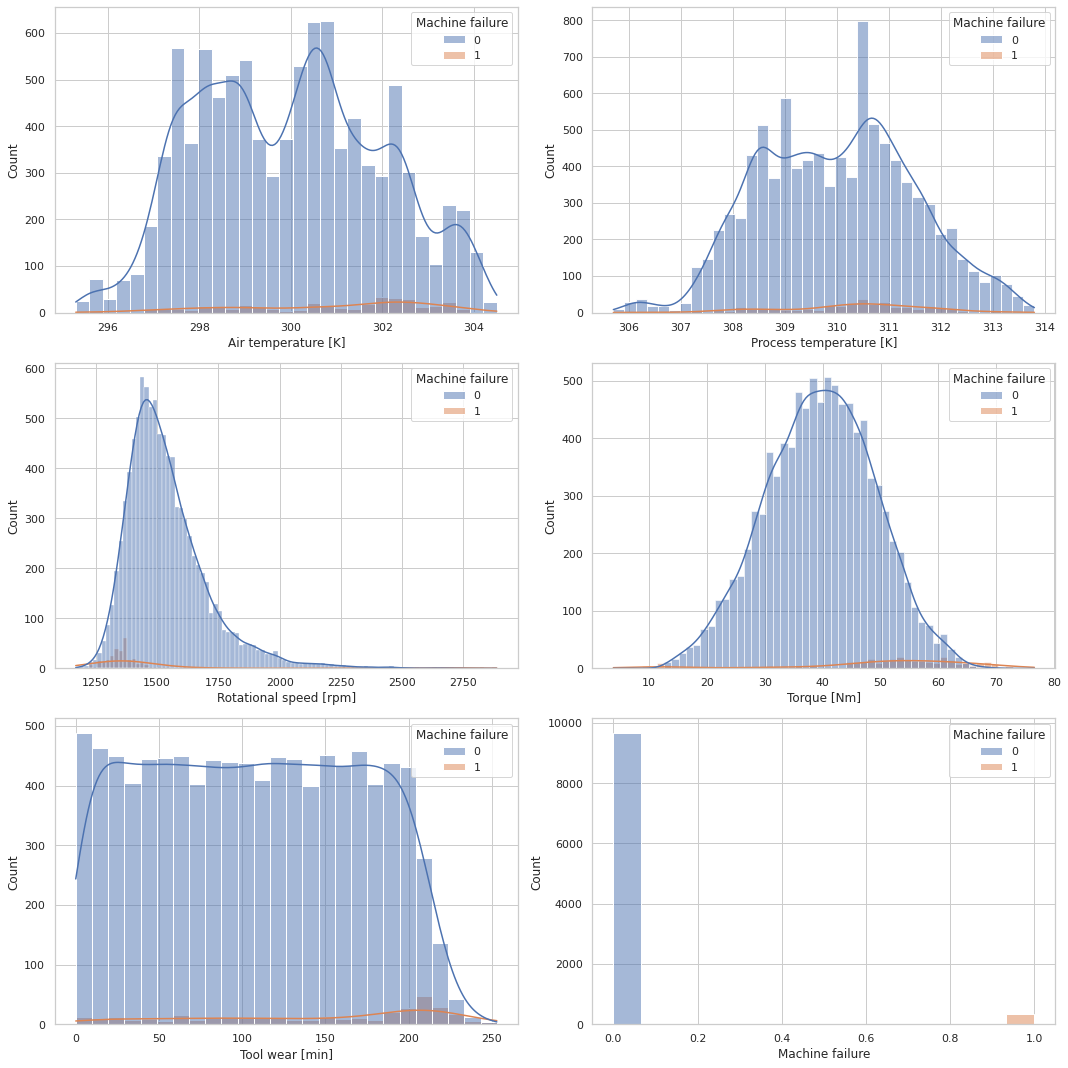

In [270]:
#plotting histogram to understand individiual variable distribution
import seaborn as sns
sns.set(style="whitegrid")
fig,axs = plt.subplots(3,2, figsize = (15,15))
sns.histplot(data=Viz_data, x="Air temperature [K]", kde=True, hue='Machine failure', ax=axs[0, 0])
sns.histplot(data=Viz_data, x="Process temperature [K]", kde=True, hue='Machine failure', ax=axs[0, 1])
sns.histplot(data=Viz_data, x="Rotational speed [rpm]", kde=True, hue='Machine failure', ax=axs[1, 0])
sns.histplot(data=Viz_data, x="Torque [Nm]", kde=True, hue='Machine failure', ax=axs[1, 1])
sns.histplot(data=Viz_data, x="Tool wear [min]", kde=True, hue='Machine failure', ax=axs[2, 0])
sns.histplot(data=Viz_data, x="Machine failure", kde=True, hue='Machine failure', ax=axs[2, 1])
fig.tight_layout()

# (B) Pairplot

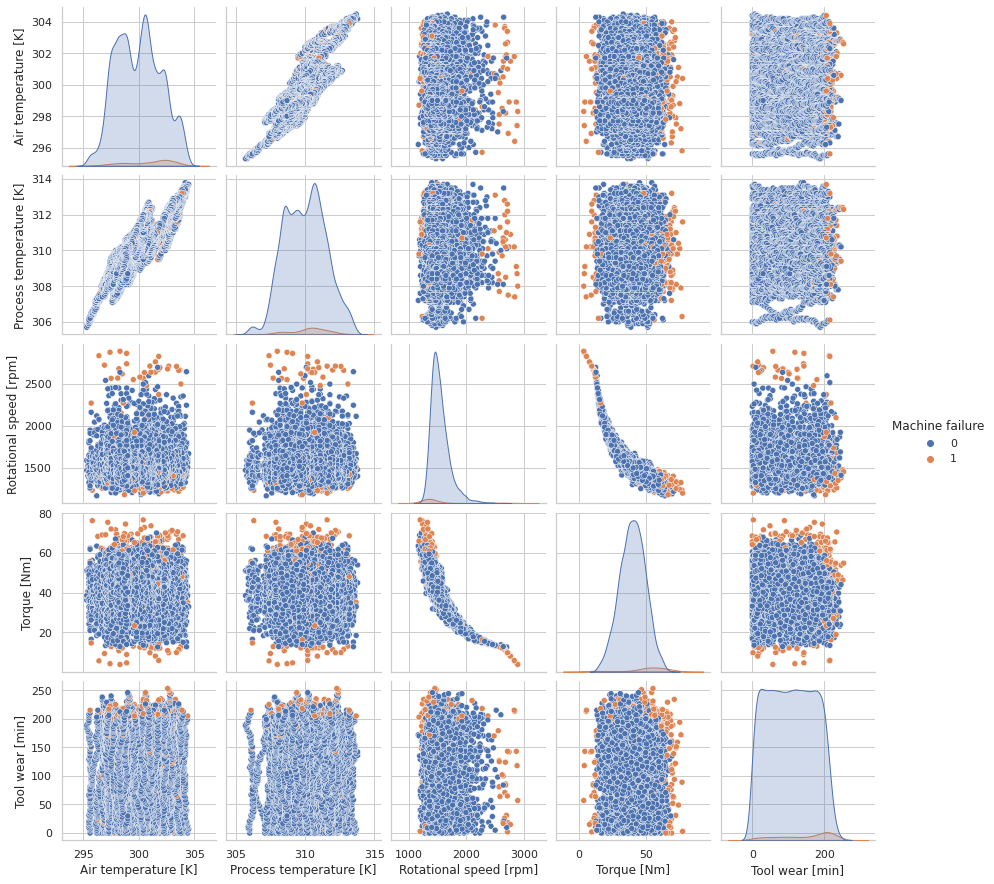

In [271]:
#plotting a scatterplot matrix on the original raw data frame
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(Viz_data,hue='Machine failure')

# (C) Violin Plot

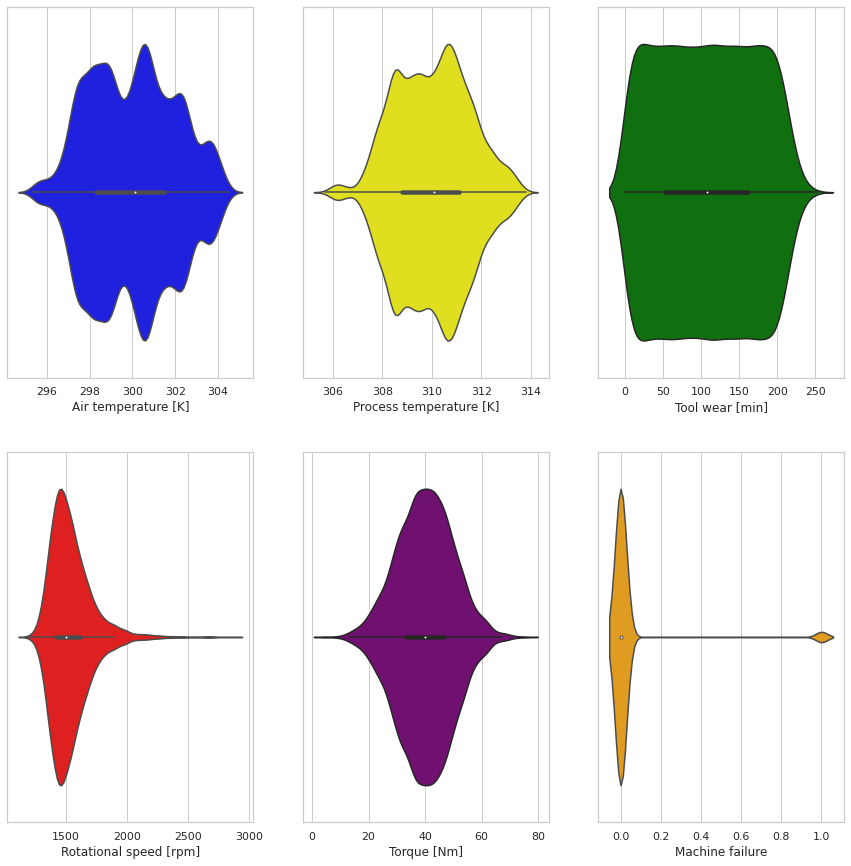

In [272]:
import seaborn as sns
sns.set(style="whitegrid")
fig,axs = plt.subplots(2,3, figsize = (15,15))
sns.violinplot(x="Air temperature [K]", data=Viz_data,hue= "Machine failure",ax=axs[0, 0], color = "Blue")
sns.violinplot(x="Process temperature [K]", data=Viz_data,hue= "Machine failure",ax=axs[0, 1], color = "Yellow")
sns.violinplot(x="Tool wear [min]", data=Viz_data,hue= "Machine failure",ax=axs[0, 2], color = "Green")
sns.violinplot(x="Rotational speed [rpm]", data=Viz_data,hue= "Machine failure",ax=axs[1, 0], color = "Red")
sns.violinplot(x="Torque [Nm]", data=Viz_data,hue= "Machine failure",ax=axs[1, 1], color = "Purple")
sns.violinplot(x="Machine failure", data=Viz_data,hue= "Machine failure",ax=axs[1, 2], color = "Orange")

#(D) Line Plot

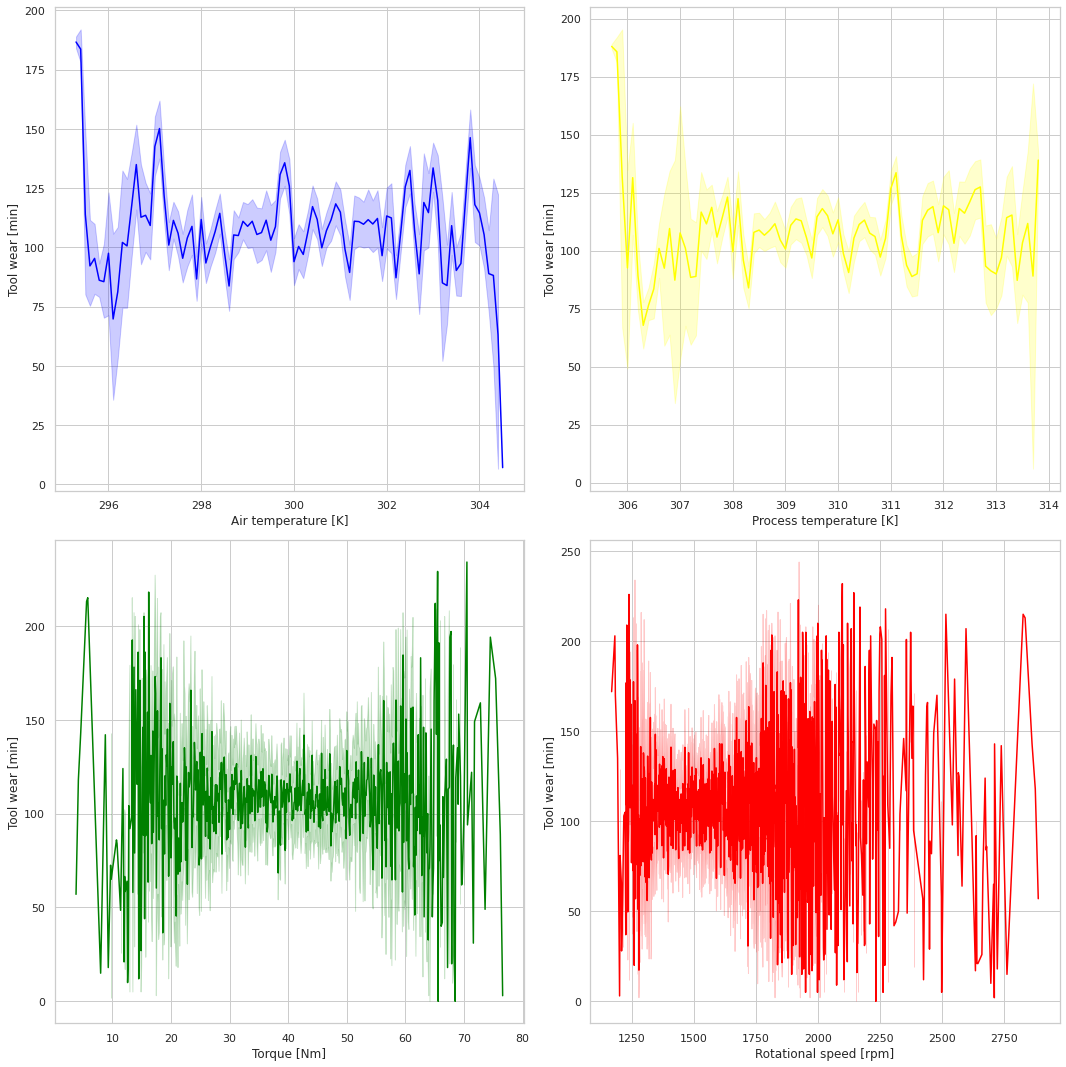

In [273]:
import seaborn as sns
sns.set(style="whitegrid")
fig,axs = plt.subplots(2,2, figsize = (15,15))
sns.lineplot(data=Viz_data, x="Air temperature [K]", y="Tool wear [min]", ax=axs[0, 0], color='Blue')
sns.lineplot(data=Viz_data, x="Process temperature [K]", y="Tool wear [min]", ax=axs[0, 1], color = 'Yellow')
sns.lineplot(data=Viz_data, x="Torque [Nm]", y="Tool wear [min]", ax=axs[1, 0], color = 'Green')
sns.lineplot(data=Viz_data, x="Rotational speed [rpm]", y="Tool wear [min]", ax=axs[1, 1], color = 'Red')
fig.tight_layout()

# (E) Heat Map (For Correlation Check)

Text(0.5, 1.0, 'Correlation Heatmap')

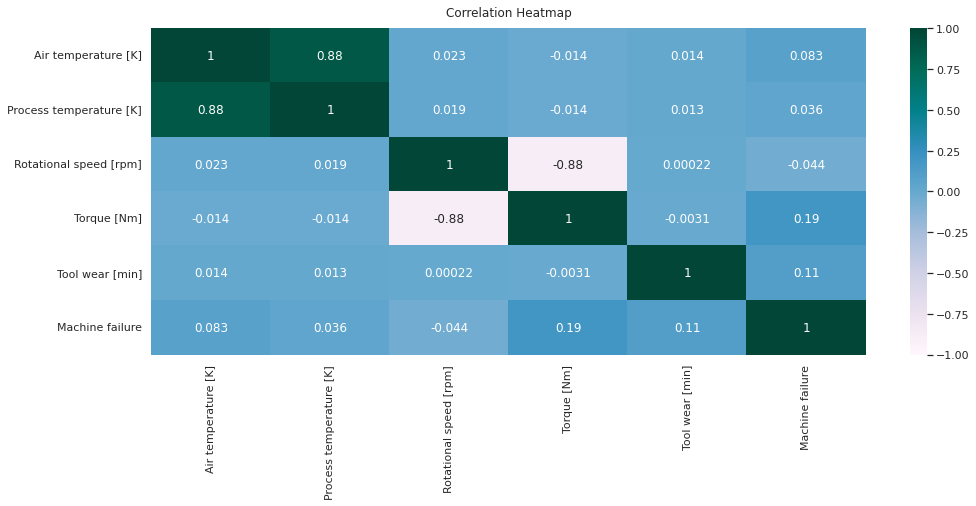

In [274]:
#plotting the heatmap on data without standardization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Increase the size of the heatmap
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(Viz_data.corr(), vmin=-1, vmax=1, annot=True, cmap='PuBuGn')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

#*After Correlation Observation with the heatmap, we have decided to remove the two highly correlated variables*

In [275]:
#dropping the 2 features
df_drop = Viz_data.drop(['Process temperature [K]','Rotational speed [rpm]'],axis = 1)

In [276]:
#viewing the dataset after removing them
df_drop

Air temperature [K]  Torque [Nm]  Tool wear [min]  Machine failure
0                   298.1         42.8                0                0
1                   298.2         46.3                3                0
2                   298.1         49.4                5                0
3                   298.2         39.5                7                0
4                   298.2         40.0                9                0
...                   ...          ...              ...              ...
9995                298.8         29.5               14                0
9996                298.9         31.8               17                0
9997                299.0         33.4               22                0
9998                299.0         48.5               25                0
9999                299.0         40.2               30                0

[10000 rows x 4 columns]

In [277]:
fail = Model_data[['TWF','HDF','PWF','OSF','RNF','Type']]
df_drop_dt = pd.concat([df_drop,fail],axis=1)
df_drop_dt

Air temperature [K]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                   298.1         42.8                0                0    0   
1                   298.2         46.3                3                0    0   
2                   298.1         49.4                5                0    0   
3                   298.2         39.5                7                0    0   
4                   298.2         40.0                9                0    0   
...                   ...          ...              ...              ...  ...   
9995                298.8         29.5               14                0    0   
9996                298.9         31.8               17                0    0   
9997                299.0         33.4               22                0    0   
9998                299.0         48.5               25                0    0   
9999                299.0         40.2               30                0    0   

      HDF  PWF  OSF  RNF  Type  
0       0    0    0    0     2  
1       0    0    0    0     1  
2       0    0    0    0     1  
3       0    0    0    0     1  
4       0    0    0    0     1  
...   ...  ...  ...  ...   ...  
9995    0    0    0    0     2  
9996    0    0    0    0     0  
9997    0    0    0    0     2  
9998    0    0    0    0     0  
9999    0    0    0    0     2  

[10000 rows x 10 columns]

NEW

#*Outlier Detection and Handling*

Checking for Outliers Visually with a Boxplot

# (F) Side-by-Side Box Plot (With Outliers)

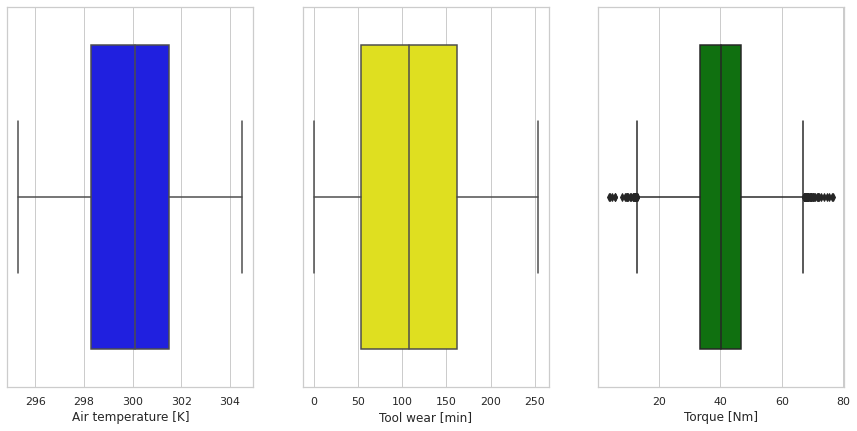

In [278]:
import seaborn as sns
sns.set(style="whitegrid")
fig,axs = plt.subplots(1,3, figsize = (15,7))
sns.boxplot(x="Air temperature [K]", data=df_drop,hue= "Machine failure",ax=axs[0], color = 'Blue')
sns.boxplot(x="Tool wear [min]", data=df_drop,hue= "Machine failure",ax=axs[1], color = 'Yellow')
sns.boxplot(x="Torque [Nm]", data=df_drop,hue= "Machine failure",ax=axs[2], color = 'Green')

We observe from the above box plot that, outliers are present in the features : '**Torque [Nm]**'

Rechecking for all outliers in each and every feature individually

In [279]:
mean = np.mean(df_drop['Torque [Nm]'])
std = np.std(df_drop['Torque [Nm]'])
print('Mean of the feature (Torque [Nm]) is: ', mean)
print('Standard Deviation of the feature (Torque [Nm]) is: ', std)

Mean of the feature (Torque [Nm]) is:  39.986909999999995
Standard Deviation of the feature (Torque [Nm]) is:  9.96843526597329


In [280]:
threshold = 3
outlier = []
for i in df_drop['Torque [Nm]']:
    z = (i-mean)/std
    if z > threshold or z < ((-1)*threshold):
        outlier.append(i)
print('Outliers in this feature (Torque [Nm]) are:\n\n',outlier)

Outliers in this feature (Torque [Nm]) are:

 [4.6, 4.2, 71.6, 5.6, 76.2, 9.3, 74.5, 8.8, 3.8, 72.8, 8.0, 9.7, 5.8, 70.6, 9.8, 70.5, 71.3, 70.0, 73.6, 70.0, 71.8, 76.6, 9.7, 72.0, 75.4]


In [281]:
mean = np.mean(df_drop['Air temperature [K]'])
std = np.std(df_drop['Air temperature [K]'])
print('Mean of the feature (Air temperature [K]) is: ', mean)
print('Standard Deviation of the feature (Air temperature [K]) is: ', std)

Mean of the feature (Air temperature [K]) is:  300.00493
Standard Deviation of the feature (Air temperature [K]) is:  2.0001586674811573


In [282]:
threshold = 3
outlier = []
for i in df_drop['Air temperature [K]']:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('Outliers in this feature (Air temperature [K]) are:\n\n', outlier)

Outliers in this feature (Air temperature [K]) are:

 []


In [283]:
mean = np.mean(df_drop['Tool wear [min]'])
std = np.std(df_drop['Tool wear [min]'])
print('Mean of the feature (Tool wear [min]) is: ', mean)
print('Standard Deviation of the feature (Tool wear [min]) is: ', std)

Mean of the feature (Tool wear [min]) is:  107.951
Standard Deviation of the feature (Tool wear [min]) is:  63.65096384973286


In [284]:
threshold = 3
outlier = []
for i in df_drop['Tool wear [min]']:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('Outliers in this feature (Tool wear [min]) are:\n\n', outlier)

Outliers in this feature (Tool wear [min]) are:

 []


*So, we found out that the outliers are only present in the Torque [Nm] feature, hence we need to take care of it before moving forward*

***Handling the outliers by imputing values with median***

In [285]:
#median imputation technique for upper outliers
median = df_drop.loc[df_drop['Torque [Nm]']< 25, 'Torque [Nm]'].median()
df_drop.loc[df_drop['Torque [Nm]'] > 55, 'Torque [Nm]'] = np.nan
df_drop.fillna(median,inplace=True)

In [286]:
#median imputation technique for lower outliers
median = df_drop.loc[df_drop['Torque [Nm]']> 25, 'Torque [Nm]'].median()
df_drop.loc[df_drop['Torque [Nm]'] < 25, 'Torque [Nm]'] = np.nan
df_drop.fillna(median,inplace=True)

In [287]:
#viewing the dataset without the outliers
df_drop

Air temperature [K]  Torque [Nm]  Tool wear [min]  Machine failure
0                   298.1         42.8                0                0
1                   298.2         46.3                3                0
2                   298.1         49.4                5                0
3                   298.2         39.5                7                0
4                   298.2         40.0                9                0
...                   ...          ...              ...              ...
9995                298.8         29.5               14                0
9996                298.9         31.8               17                0
9997                299.0         33.4               22                0
9998                299.0         48.5               25                0
9999                299.0         40.2               30                0

[10000 rows x 4 columns]

In [288]:
#Rechecking mean and standard deviation of the feature after
#handling the outliers
mean = np.mean(df_drop['Torque [Nm]'])
std = np.std(df_drop['Torque [Nm]'])
print('Mean of the feature (Torque [Nm]) is: ', mean)
print('Standard Deviation of the feature (Torque [Nm]) is: ', std)

Mean of the feature (Torque [Nm]) is:  40.14219000000001
Standard Deviation of the feature (Torque [Nm]) is:  6.949848559781716


In [289]:
#Checking if the outliers have been removed after handling it
threshold = 3
outlier = []
for i in df_drop['Torque [Nm]']:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('Outliers in this feature (Torque [Nm]) are:\n\n', outlier)

Outliers in this feature (Torque [Nm]) are:

 []


In [290]:
df_drop

Air temperature [K]  Torque [Nm]  Tool wear [min]  Machine failure
0                   298.1         42.8                0                0
1                   298.2         46.3                3                0
2                   298.1         49.4                5                0
3                   298.2         39.5                7                0
4                   298.2         40.0                9                0
...                   ...          ...              ...              ...
9995                298.8         29.5               14                0
9996                298.9         31.8               17                0
9997                299.0         33.4               22                0
9998                299.0         48.5               25                0
9999                299.0         40.2               30                0

[10000 rows x 4 columns]

# (G) Side-by-Side Box Plot (Without Outliers)

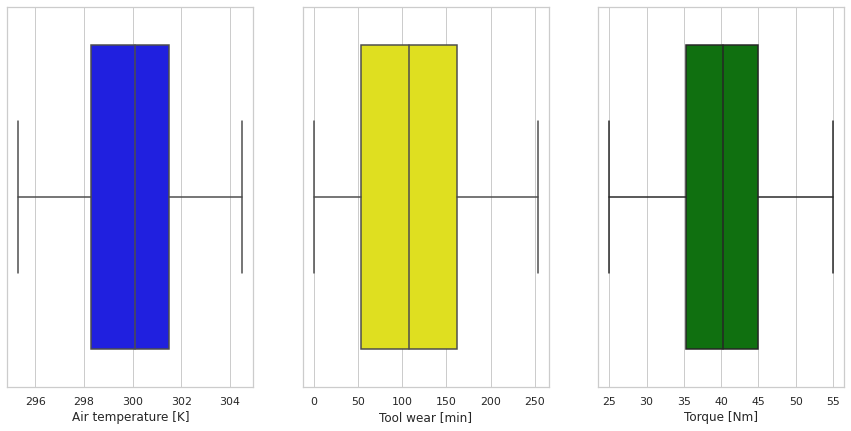

In [291]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
sns.set(style="whitegrid")
fig,axs = plt.subplots(1,3, figsize = (15,7))
sns.boxplot(x="Air temperature [K]", data=df_drop,hue= "Machine failure",ax=axs[0], color = 'Blue')
sns.boxplot(x="Tool wear [min]", data=df_drop,hue= "Machine failure",ax=axs[1], color = 'Yellow')
sns.boxplot(x="Torque [Nm]", data=df_drop,hue= "Machine failure",ax=axs[2], color = 'Green')

#Model Implementation

In [292]:
from sklearn.model_selection import train_test_split
#taking our target variable and storing it in y or output set
y = df_drop_dt['Machine failure']
#consecutively, dropping the target variable or input set
X=df_drop_dt.drop('Machine failure',axis=1)

In [293]:
class Preprocessing:



    def __init__(self, X, y):

        self.X=X

        self.y=y



    def splitdata(self):

        X_train,X_test,y_train,y_test= train_test_split(self.X,self.y,test_size=0.3, random_state=0)



        return X_train,X_test,y_train,y_test



    def normalizetrainingdata(self,X):

        mean=np.mean(X,0)

        std=np.std(X,0)

        normalizedtrainingdata=(X-mean)/std

        return normalizedtrainingdata, mean, std



    def normalizetestdata(self,X,trainmean,trainstd):

        normalizedtestdata=(X-trainmean)/trainstd

        return normalizedtestdata



    def datafit(self,X, y):

        X_train,X_test,y_train,y_test=self.splitdata()

        X_train,mean,std=self.normalizetrainingdata(X_train)

        X_test=self.normalizetestdata(X_test,mean,std)

        return X_train,X_test,y_train,y_test

In [294]:
a=Preprocessing(X,y)
a.datafit(X,y)

(      Air temperature [K]  Torque [Nm]  Tool wear [min]       TWF       HDF  \
 7681             0.348551     0.373900         1.722283 -0.069863 -0.110208   
 9031            -1.245345    -1.609837        -1.232530 -0.069863 -0.110208   
 3691             1.045881     0.694504         1.425238 -0.069863 -0.110208   
 202             -0.797062    -0.427610         0.002551 -0.069863 -0.110208   
 5625             1.344736    -1.559742         0.612274 -0.069863 -0.110208   
 ...                   ...          ...              ...       ...       ...   
 9225            -0.996299    -1.639893         0.205792 -0.069863 -0.110208   
 4859             1.842829    -0.137062         0.002551 -0.069863 -0.110208   
 3264             0.647407     0.413975         1.268899 -0.069863 -0.110208   
 9845            -0.846871     0.744598        -1.154360 -0.069863 -0.110208   
 2732            -0.149542     1.746485         0.487202 -0.069863 -0.110208   
 
            PWF       OSF       RNF   

In [295]:
from tqdm import tqdm
from sklearn.metrics import classification_report

# 1. Logistic Regression

In [296]:

class LogisticRegression:

  def __init__(self,X,y,learningRate, tolerance, maxIteration) -> None:
    self.X=X
    self.y=y
    self.learningRate = learningRate
    self.tolerance = tolerance 
    self.maxIteration = maxIteration
    
 
  # def add_X0(self,X):
  #   return np.column_stack([np.ones[0],X])

  def sigmoid(self, z):
    sig = 1/(1+np.exp(-z))
    return sig

  def costFunction(self, X, y):
    sig = self.sigmoid(X.dot(self.w))
    # approach1
    cost = (y*np.log(sig)+(1-y)*np.log(1-sig)).sum()
    cost = -cost/X.shape[0]
    # approach2
    # cost = (np.log(np.ones(X.shape[0])+np.exp(X.dot(self.w))-X.dot(self.w).dot(y)))
    # cost = cost.sum()
    return cost
  
  def gradient(self, X, y):
    sig = self.sigmoid(X.dot(self.w))
    gradient = (sig-y).dot(X)
    return gradient
  
  def gradientDescent(self, X, y):
    errors = []
    last_error = float('inf')
    for i in tqdm(range(self.maxIteration)):
      self.w = self.w - self.learningRate * self.gradient(X, y)
      current_error = self.costFunction(X, y)
      diff = last_error - current_error
      last_error = current_error
      errors.append(current_error)

      if np.abs(diff) < self.tolerance:
        print('model stopped learning')
        break
    return
  
  def predict(self, X):
    sig = self.sigmoid(X.dot(self.w))
    return np.around(sig)  

  def evaluate(self, y, y_hat):
    y = (y==1)
    y_hat = (y_hat == 1)                
    recall = (y & y_hat).sum()/y.sum()
    precision = (y & y_hat).sum()/y_hat.sum()
    f_score = 2*(precision*recall)/(precision+recall)
    accuracy = np.sum(y == y_hat)/len(y)
    return f_score, recall, precision , accuracy             



  def fit(self):
    X_train,X_test,y_train,y_test=a.datafit(X,y)
    print('Solving using GD')
    self.w = np.ones(X_train.shape[1], dtype=np.float64)*0
    self.gradientDescent(X_train,y_train)
    print(self.w)
    y_train_hat = self.predict(X_train)
    f_score, recall, precision, accuracy = self.evaluate(y_train, y_train_hat)
    print('Training F1 score {}'.format(f_score))
    print('Training recall score {}'.format(recall))
    print('Training precision score {}'.format(precision))
    print('Accuracy Score {}'.format(accuracy))

   








In [297]:
lr = LogisticRegression(X,y,learningRate = 0.0001, tolerance = 0.00005, maxIteration = 10000)

In [298]:
lr.fit()

Solving using GD


  0%|          | 19/10000 [00:00<00:52, 188.37it/s]/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
  9%|▉         | 911/10000 [00:05<00:55, 165.16it/s]

model stopped learning
Air temperature [K]    0.025225
Torque [Nm]            0.042131
Tool wear [min]        0.022222
TWF                    5.721656
HDF                    9.021626
PWF                    8.285594
OSF                    8.099229
RNF                   -0.003692
Type                   0.006842
dtype: float64
Training F1 score 0.9937106918238994
Training recall score 0.9875
Training precision score 1.0
Accuracy Score 0.9995714285714286


# 2. Gaussian Naive Bayes

In [299]:
from sklearn.model_selection import train_test_split
#taking our target variable and storing it in y or output set
y = df_drop['Machine failure']
#consecutively, dropping the target variable or input set
X=df_drop.drop('Machine failure',axis=1)

In [300]:
X=X.iloc[:,:].values
y=y.iloc[:].values

In [301]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)
X_train_norm = (X_train - np.mean(X_train)) / (np.std(X_train))
X_test_norm = (X_test - np.mean(X_train)) / (np.std(X_train))
X_train_norm.shape
X_train_norm

array([[ 1.29256601, -0.92475326,  0.14431139],
       [ 1.30461666, -0.91098109, -1.28455118],
       [ 1.28051536, -0.87482914, -0.63037314],
       ...,
       [ 1.25985711, -0.92991782,  0.05823533],
       [ 1.33130024, -0.93852543, -0.16556242],
       [ 1.28137612, -0.99447487,  0.3078559 ]])

In [302]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)
oversampled_X, oversampled_Y = sm.fit_resample(X_train, y_train)
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
oversampled_X_norm_sm = (oversampled_X - np.mean(oversampled_X)) / (np.std(oversampled_X))
oversampled_y = oversampled.iloc[:,0]
oversampled_y

0        0
1        0
2        0
3        0
4        0
        ..
13523    1
13524    1
13525    1
13526    1
13527    1
Name: 0, Length: 13528, dtype: int64

In [303]:
from scipy.stats import norm
class GaussianNaiveBayes:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

    def distribution(self, data):
        mean = np.mean(data)
        std = np.std(data)
        dist = norm(mean, std)
        
        return dist

    def probability(self, X, prior, probfor):
        prob = prior
        if probfor == 0:
            for i in range(self.X0_train.shape[1]):
                prob *= self.dist_X0[i].pdf(X[i])
        else:
            for i in range(self.X1_train.shape[1]):
                prob *= self.dist_X1[i].pdf(X[i])
        return prob

    def fit(self):
        
        self.X0_train = self.X_train[self.y_train == 0]
        self.X1_train = self.X_train[self.y_train == 1]

        self.prior0 = len(self.X0_train)/len(self.X_train)
        self.prior1 = len(self.X1_train)/len(self.X_train)

        self.dist_X0 = dict()
        self.dist_X1 = dict()

        for i in range(self.X0_train.shape[1]):
            
            self.dist_X0[i] = self.distribution(self.X0_train[i])
            self.dist_X1[i] = self.distribution(self.X1_train[i])
      
    def predict(self):
        self.predictions = []
        for sample, target in zip(self.X_train, self.y_train):
            prob0 = self.probability(sample, self.prior0, 0)
            prob1 = self.probability(sample, self.prior1, 1)

            self.predictions.append(np.argmax([prob0, prob1]))

        f_score, recall, precision, accuracy = evaluate(self.y_train, np.array(self.predictions))
        print('For Training Data')
        print('F1 score of train data {}'.format(f_score))
        print('Recall of train data {}'.format(recall))
        print('Precision of train data {}'.format(precision))
        print('Accuracy of train data {}'.format(accuracy))
        
        self.predictions = []
        for sample, target in zip(self.X_test, self.y_test):
            prob0 = self.probability(sample, self.prior0, 0)
            prob1 = self.probability(sample, self.prior1, 1)

            self.predictions.append(np.argmax([prob0, prob1]))

        f_score, recall, precision, accuracy = evaluate(self.y_test, np.array(self.predictions))
        print('For Test Data')
        print('F1 score of test data {}'.format(f_score))
        print('Recall of test data {}'.format(recall))
        print('Precision of test data {}'.format(precision))
        print('Accuracy of test data {}'.format(accuracy))

In [304]:
from sklearn.metrics import confusion_matrix
def evaluate(y, y_hat):

      y = (y == 1)
      y_hat = (y_hat == 1)
      accuracy = (y == y_hat).sum() / y.size
      recall = (y & y_hat).sum()/ y.sum()
      precision = (y & y_hat).sum()/ y_hat.sum()

      f_score = 2*(precision * recall)/(precision+recall)  
      print(confusion_matrix(y, y_hat))     
      return accuracy, recall, precision, f_score

In [305]:
nb = GaussianNaiveBayes(X_train_norm, y_train, X_test_norm, y_test)
nb.fit()
nb.predict()

<ipython-input-304-55c39f10e51f>:8: RuntimeWarning: invalid value encountered in long_scalars
  precision = (y & y_hat).sum()/ y_hat.sum()


[[6764    0]
 [ 236    0]]
For Training Data
F1 score of train data 0.9662857142857143
Recall of train data 0.0
Precision of train data nan
Accuracy of train data nan
[[2897    0]
 [ 103    0]]
For Test Data
F1 score of test data 0.9656666666666667
Recall of test data 0.0
Precision of test data nan
Accuracy of test data nan


<ipython-input-304-55c39f10e51f>:8: RuntimeWarning: invalid value encountered in long_scalars
  precision = (y & y_hat).sum()/ y_hat.sum()


In [306]:
nb = GaussianNaiveBayes(oversampled_X_norm_sm, oversampled_y, X_test_norm, y_test)
nb.fit()
nb.predict()

<ipython-input-304-55c39f10e51f>:8: RuntimeWarning: invalid value encountered in long_scalars
  precision = (y & y_hat).sum()/ y_hat.sum()


[[6764    0]
 [6764    0]]
For Training Data
F1 score of train data 0.5
Recall of train data 0.0
Precision of train data nan
Accuracy of train data nan
[[2897    0]
 [  95    8]]
For Test Data
F1 score of test data 0.9683333333333334
Recall of test data 0.07766990291262135
Precision of test data 1.0
Accuracy of test data 0.14414414414414414


#3. SVM

In [352]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)
oversampled_X, oversampled_Y = sm.fit_resample(X_train, y_train)
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
oversampled_X_norm_sm = (oversampled_X - np.mean(oversampled_X)) / (np.std(oversampled_X))
oversampled_y = oversampled.iloc[:,0]
oversampled_y

0        0
1        0
2        0
3        0
4        0
        ..
13523    1
13524    1
13525    1
13526    1
13527    1
Name: 0, Length: 13528, dtype: int64

In [353]:
oversampled_X_norm_sm

array([[ 1.24341708, -0.9891839 ,  0.08724872],
       [ 1.25555078, -0.97531681, -1.35146154],
       [ 1.23128338, -0.93891571, -0.69277492],
       ...,
       [ 1.22893167, -1.01207273,  0.37290257],
       [ 1.26874857, -0.97261696, -0.77077728],
       [ 1.2538639 , -0.91648752,  0.57259676]])

In [357]:
import random as rnd
class SVM():
    def __init__(self, max_iter=100, C=1.0, epsilon=0.001):
        self.max_iter = max_iter
        self.C = C
        self.epsilon = epsilon
    def fit(self, X, y):
        n, d = X.shape[0], X.shape[1]
        alpha = np.zeros((n))
        count = 0
        while True:
            count += 1
            alpha_prev = np.copy(alpha)
            for j in range(0, n):
                i = self.get_rnd_int(0, n-1, j)
                x_i, x_j, y_i, y_j = X[i,:], X[j,:], y[i], y[j]
                k_ij = -2 * self.kernel(x_i, x_j) + self.kernel(x_i, x_i) + self.kernel(x_j, x_j)
                if k_ij == 0:
                    continue
                alpha_prime_j, alpha_prime_i = alpha[j], alpha[i]
                (L, H) = self.compute_L_H(self.C, alpha_prime_j, alpha_prime_i, y_j, y_i)

                self.w = self.calc_w(alpha, y, X)
                self.b = self.calc_b(X, y, self.w)

                E_i = self.E(x_i, y_i, self.w, self.b)
                E_j = self.E(x_j, y_j, self.w, self.b)

                alpha[j] = alpha_prime_j + float(y_j * (E_i - E_j))/k_ij
                alpha[j] = max(alpha[j], L)
                alpha[j] = min(alpha[j], H)

                alpha[i] = alpha_prime_i + y_i*y_j * (alpha_prime_j - alpha[j])
            # Check convergence
            diff = np.linalg.norm(alpha - alpha_prev)
            if diff < self.epsilon:
                break
            
            if count >= self.max_iter:
                print("The max of %d iterations has been reached" % (self.max_iter))
                self.support_vectors = X[np.where(alpha > 0)[0], :]
                return
        self.b = self.calc_b(X, y, self.w)
        self.w = self.calc_w(alpha, y, X)

        # Get support vectors
        alpha_idx = np.where(alpha > 0)[0]
        self.support_vectors = X[alpha_idx, :]
        return self.support_vectors, count
    def getsupportvectors(self):
        return self.support_vectors
    def predict(self, X):
        return self.h(X, self.w, self.b)
    def getcoeffintercept(self):
        return self.w, self.b
    def calc_b(self, X, y, w):
        b_tmp = y - np.dot(w.T, X.T)
        return np.mean(b_tmp)
    def calc_w(self, alpha, y, X):
        return np.dot(X.T, np.multiply(alpha,y))
    def h(self, X, w, b):
        return np.sign(np.dot(w.T, X.T) + b).astype(int)
    def E(self, x_k, y_k, w, b):
        return self.h(x_k, w, b) - y_k
    def compute_L_H(self, C, alpha_prime_j, alpha_prime_i, y_j, y_i):
        if(y_i != y_j):
            return (max(0, alpha_prime_j - alpha_prime_i), min(C, C - alpha_prime_i + alpha_prime_j))
        else:
            return (max(0, alpha_prime_i + alpha_prime_j - C), min(C, alpha_prime_i + alpha_prime_j))
    def get_rnd_int(self, a,b,z):
        i = z
        cnt=0
        while i == z and cnt<1000:
            i = rnd.randint(a,b)
            cnt=cnt+1
        return i
    def kernel(self, x1, x2):
        return np.dot(x1, x2.T)
    def predict_proba(self, X):
        return np.dot(self.w.T, X.T) + self.b





In [361]:



model = SVM(max_iter=20, C=1.0, epsilon=0.00001)
y_train_svm = []
y_test_svm = []
for i in range(len(y_train)):
    if(y_train[i] == 0):
      y_train_svm.append(-1)
    else:
      y_train_svm.append(1)

for i in range(len(y_test)):
    if(y_test[i] == 0):
      y_test_svm.append(-1)
    else:
      y_test_svm.append(1)

y_train_svm = np.asarray(y_train_svm)
y_test_svm = np.asarray(y_test_svm)

model.fit(X_train_norm, y_train_svm)

Y_predicted = [model.predict(x) for x in X_train_norm]
f_score, recall, precision, accuracy = evaluate(y_train_svm, np.array(Y_predicted))
print('F1 score of train data {}'.format(f_score))
print('Recall of train data {}'.format(recall))
print('Precision of train data {}'.format(precision))
print('Accuracy of train data {}'.format(accuracy))

Y_predicted = [model.predict(x) for x in X_test]
f_score, recall, precision, accuracy = evaluate(y_test_svm, np.array(Y_predicted))
print('F1 score of test data {}'.format(f_score))
print('Recall of test data {}'.format(recall))
print('Precision of test data {}'.format(precision))
print('Accuracy of test data {}'.format(accuracy))


[[6764    0]
 [ 234    2]]
F1 score of train data 0.9665714285714285
Recall of train data 0.00847457627118644
Precision of train data 1.0
Accuracy of train data 0.01680672268907563
[[   0 2897]
 [   0  103]]
F1 score of test data 0.034333333333333334
Recall of test data 1.0
Precision of test data 0.034333333333333334
Accuracy of test data 0.06638736706413148


# 4. Decision Tree

In [312]:
class Node:
    '''
    Helper class which implements a single tree node.
    '''
    def __init__(self, feature=None, threshold=None, data_left=None, data_right=None, gain=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.data_left = data_left
        self.data_right = data_right
        self.gain = gain
        self.value = value

In [313]:
from collections import Counter
class DecisionTree:
    '''
    Class which implements a decision tree classifier algorithm.
    '''
    def __init__(self, min_samples_split=2, max_depth=5):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.root = None
        
    @staticmethod
    def _entropy(s):
        '''
        Helper function, calculates entropy from an array of integer values.
        
        :param s: list
        :return: float, entropy value
        '''
        # Convert to integers to avoid runtime errors
        counts = np.bincount(np.array(s, dtype=np.int64))
        # Probabilities of each class label
        percentages = counts / len(s)

        # Caclulate entropy
        entropy = 0
        for pct in percentages:
            if pct > 0:
                entropy += pct * np.log2(pct)
        return -entropy
    
    def _information_gain(self, parent, left_child, right_child):
        '''
        Helper function, calculates information gain from a parent and two child nodes.
        
        :param parent: list, the parent node
        :param left_child: list, left child of a parent
        :param right_child: list, right child of a parent
        :return: float, information gain
        '''
        num_left = len(left_child) / len(parent)
        num_right = len(right_child) / len(parent)
        
        # One-liner which implements the previously discussed formula
        return self._entropy(parent) - (num_left * self._entropy(left_child) + num_right * self._entropy(right_child))
    
    def _best_split(self, X, y):
        '''
        Helper function, calculates the best split for given features and target
        
        :param X: np.array, features
        :param y: np.array or list, target
        :return: dict
        '''
        best_split = {}
        best_info_gain = -1
        n_rows, n_cols = X.shape
        
        # For every dataset feature
        for f_idx in range(n_cols):
            X_curr = X[:, f_idx]
            # For every unique value of that feature
            for threshold in np.unique(X_curr):
                # Construct a dataset and split it to the left and right parts
                # Left part includes records lower or equal to the threshold
                # Right part includes records higher than the threshold
                df = np.concatenate((X, y.reshape(1, -1).T), axis=1)
                df_left = np.array([row for row in df if row[f_idx] <= threshold])
                df_right = np.array([row for row in df if row[f_idx] > threshold])

                # Do the calculation only if there's data in both subsets
                if len(df_left) > 0 and len(df_right) > 0:
                    # Obtain the value of the target variable for subsets
                    y = df[:, -1]
                    y_left = df_left[:, -1]
                    y_right = df_right[:, -1]

                    # Caclulate the information gain and save the split parameters
                    # if the current split if better then the previous best
                    gain = self._information_gain(y, y_left, y_right)
                    if gain > best_info_gain:
                        best_split = {
                            'feature_index': f_idx,
                            'threshold': threshold,
                            'df_left': df_left,
                            'df_right': df_right,
                            'gain': gain
                        }
                        best_info_gain = gain
        return best_split
    
    def _build(self, X, y, depth=0):
        '''
        Helper recursive function, used to build a decision tree from the input data.
        
        :param X: np.array, features
        :param y: np.array or list, target
        :param depth: current depth of a tree, used as a stopping criteria
        :return: Node
        '''
        n_rows, n_cols = X.shape
        
        # Check to see if a node should be leaf node
        if n_rows >= self.min_samples_split and depth <= self.max_depth:
            # Get the best split
            best = self._best_split(X, y)
            # If the split isn't pure
            if best['gain'] > 0:
                # Build a tree on the left
                left = self._build(
                    X=best['df_left'][:, :-1], 
                    y=best['df_left'][:, -1], 
                    depth=depth + 1
                )
                right = self._build(
                    X=best['df_right'][:, :-1], 
                    y=best['df_right'][:, -1], 
                    depth=depth + 1
                )
                return Node(
                    feature=best['feature_index'], 
                    threshold=best['threshold'], 
                    data_left=left, 
                    data_right=right, 
                    gain=best['gain']
                )
        # Leaf node - value is the most common target value 
        return Node(
            value=Counter(y).most_common(1)[0][0]
        )
    
    def fit(self, X, y):
        '''
        Function used to train a decision tree classifier model.
        
        :param X: np.array, features
        :param y: np.array or list, target
        :return: None
        '''
        # Call a recursive function to build the tree
        self.root = self._build(X, y)
        
    def _predict(self, x, tree):
        '''
        Helper recursive function, used to predict a single instance (tree traversal).
        
        :param x: single observation
        :param tree: built tree
        :return: float, predicted class
        '''
        # Leaf node
        if tree.value != None:
            return tree.value
        feature_value = x[tree.feature]
        
        # Go to the left
        if feature_value <= tree.threshold:
            return self._predict(x=x, tree=tree.data_left)
        
        # Go to the right
        if feature_value > tree.threshold:
            return self._predict(x=x, tree=tree.data_right)
        
    def predict(self, X):
        '''
        Function used to classify new instances.
        
        :param X: np.array, features
        :return: np.array, predicted classes
        '''
        # Call the _predict() function for every observation
        return [self._predict(x, self.root) for x in X]

In [314]:
model = DecisionTree()

In [315]:
model.fit(X_train_norm, y_train)
preds = model.predict(X_test_norm)

In [316]:
np.array(preds, dtype=np.int64)

array([0, 0, 0, ..., 0, 0, 0])

In [317]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [318]:
fp = 0
fn = 0

tp = 0
tn = 0

for actual_value, predicted_value in zip(y_test, preds):
    # let's first see if it's a true (t) or false prediction (f)
    if predicted_value == actual_value: # t?
        if predicted_value == 1: # tp
            tp += 1
        else: # tn
            tn += 1
    else: # f?
        if predicted_value == 1: # fp
            fp += 1
        else: # fn
            fn += 1
            
our_confusion_matrix = [
    [tn, fp],
    [fn, tp]
]
# we convert it to numpy array to be printed properly as a matrix

our_confusion_matrix = np.array(our_confusion_matrix)
our_confusion_matrix

array([[2891,    6],
       [  98,    5]])

In [319]:
accuracy = (tp + tn)/( tp + tn + fp +fn )
accuracy

0.9653333333333334

In [320]:
final_precision = tp / ( tp + fp )
final_precision

0.45454545454545453

In [321]:
final_recall = tp / ( tp + fn )
final_recall

0.04854368932038835

In [322]:
f1_score = 2 * ((final_precision * final_recall) / (final_precision + final_recall))
f1_score

0.08771929824561403

#Feature Engineering

In [323]:
Model_data

UDI Product ID  Air temperature [K]  Process temperature [K]  \
0         1     M14860                298.1                    308.6   
1         2     L47181                298.2                    308.7   
2         3     L47182                298.1                    308.5   
3         4     L47183                298.2                    308.6   
4         5     L47184                298.2                    308.7   
...     ...        ...                  ...                      ...   
9995   9996     M24855                298.8                    308.4   
9996   9997     H39410                298.9                    308.4   
9997   9998     M24857                299.0                    308.6   
9998   9999     H39412                299.0                    308.7   
9999  10000     M24859                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF  Type  
0       0    0    0    0    0     2  
1       0    0    0    0    0     1  
2       0    0    0    0    0     1  
3       0    0    0    0    0     1  
4       0    0    0    0    0     1  
...   ...  ...  ...  ...  ...   ...  
9995    0    0    0    0    0     2  
9996    0    0    0    0    0     0  
9997    0    0    0    0    0     2  
9998    0    0    0    0    0     0  
9999    0    0    0    0    0     2  

[10000 rows x 14 columns]

In [324]:
from sklearn.model_selection import train_test_split
#taking our target variable and storing it in y or output set
y = df_drop['Machine failure']
#consecutively, dropping the target variable or input set
X=df_drop.drop('Machine failure',axis=1)

In [325]:
o = Model_data[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]
n = Model_data[['TWF','HDF','PWF','OSF','RNF','Type']]
a = Model_data[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']].multiply(Model_data['Air temperature [K]'], axis = "index")
a = a.add_prefix('air_temp_')
b = Model_data[['Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']].multiply(Model_data['Process temperature [K]'], axis = "index")
b = b.add_prefix('proc_temp_')
c = Model_data[['Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']].multiply(Model_data['Rotational speed [rpm]'], axis = "index")
c = c.add_prefix('rs_')
d = Model_data[['Torque [Nm]','Tool wear [min]']].multiply(Model_data['Torque [Nm]'], axis = "index")
d = d.add_prefix('tq_')
e = Model_data[['Tool wear [min]']].multiply(Model_data['Tool wear [min]'], axis = "index")
e = e.add_prefix('tl_')
df_3 = pd.concat([o,a,b,c,d,e,y,n],axis=1, join="inner")
df_3

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                   298.1                    308.6                    1551   
1                   298.2                    308.7                    1408   
2                   298.1                    308.5                    1498   
3                   298.2                    308.6                    1433   
4                   298.2                    308.7                    1408   
...                   ...                      ...                     ...   
9995                298.8                    308.4                    1604   
9996                298.9                    308.4                    1632   
9997                299.0                    308.6                    1645   
9998                299.0                    308.7                    1408   
9999                299.0                    308.7                    1500   

      Torque [Nm]  Tool wear [min]  air_temp_Air temperature [K]  \
0            42.8                0                      88863.61   
1            46.3                3                      88923.24   
2            49.4                5                      88863.61   
3            39.5                7                      88923.24   
4            40.0                9                      88923.24   
...           ...              ...                           ...   
9995         29.5               14                      89281.44   
9996         31.8               17                      89341.21   
9997         33.4               22                      89401.00   
9998         48.5               25                      89401.00   
9999         40.2               30                      89401.00   

      air_temp_Process temperature [K]  air_temp_Rotational speed [rpm]  \
0                             91993.66                         462353.1   
1                             92054.34                         419865.6   
2                             91963.85                         446553.8   
3                             92024.52                         427320.6   
4                             92054.34                         419865.6   
...                                ...                              ...   
9995                          92149.92                         479275.2   
9996                          92180.76                         487804.8   
9997                          92271.40                         491855.0   
9998                          92301.30                         420992.0   
9999                          92301.30                         448500.0   

      air_temp_Torque [Nm]  air_temp_Tool wear [min]  ...  tq_Torque [Nm]  \
0                 12758.68                       0.0  ...         1831.84   
1                 13806.66                     894.6  ...         2143.69   
2                 14726.14                    1490.5  ...         2440.36   
3                 11778.90                    2087.4  ...         1560.25   
4                 11928.00                    2683.8  ...         1600.00   
...                    ...                       ...  ...             ...   
9995               8814.60                    4183.2  ...          870.25   
9996               9505.02                    5081.3  ...         1011.24   
9997               9986.60                    6578.0  ...         1115.56   
9998              14501.50                    7475.0  ...         2352.25   
9999              12019.80                    8970.0  ...         1616.04   

      tq_Tool wear [min]  tl_Tool wear [min]  Machine failure  TWF  HDF  PWF  \
0                    0.0                   0                0    0    0    0   
1                  138.9                   9                0    0    0    0   
2                  247.0                  25                0    0    0    0   
3                  276.5                  49                0    0    0    0   
4                  360.0  

Text(0.5, 1.0, 'Correlation Heatmap')

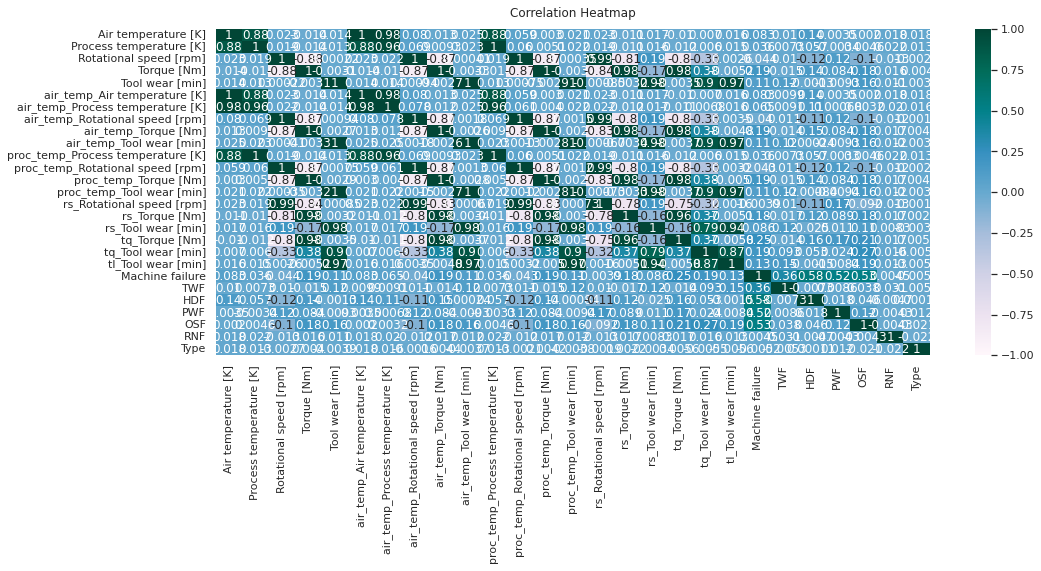

In [326]:
#plotting the heatmap on data without standardization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Increase the size of the heatmap
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_3.corr(), vmin=-1, vmax=1, annot=True, cmap='PuBuGn')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

### PCA 

In [327]:
#taking our target variable and storing it in y or output set
y1 = df_3['Machine failure']
#consecutively, dropping the target variable or input set
X1 =df_3.drop('Machine failure',axis=1)

In [328]:
#standardize the values in each column
X1_new = (X1-X1.mean())/X1.std()

#view new data frame
X1_new

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0               -0.952342                -0.947313                0.068182   
1               -0.902348                -0.879915               -0.729435   
2               -0.952342                -1.014710               -0.227438   
3               -0.902348                -0.947313               -0.589992   
4               -0.902348                -0.879915               -0.729435   
...                   ...                      ...                     ...   
9995            -0.602387                -1.082108                0.363802   
9996            -0.552394                -1.082108                0.519979   
9997            -0.502400                -0.947313                0.592489   
9998            -0.502400                -0.879915               -0.729435   
9999            -0.502400                -0.879915               -0.216283   

      Torque [Nm]  Tool wear [min]  air_temp_Air temperature [K]  \
0        0.282186        -1.695899                     -0.952283   
1        0.633276        -1.648769                     -0.902618   
2        0.944242        -1.617349                     -0.952283   
3       -0.048843        -1.585930                     -0.902618   
4        0.001313        -1.554510                     -0.902618   
...           ...              ...                           ...   
9995    -1.051959        -1.475960                     -0.604277   
9996    -0.821242        -1.428831                     -0.554495   
9997    -0.660744        -1.350281                     -0.504696   
9998     0.853962        -1.303152                     -0.504696   
9999     0.021375        -1.224602                     -0.504696   

      air_temp_Process temperature [K]  air_temp_Rotational speed [rpm]  \
0                            -0.980060                         0.013056   
1                            -0.921303                        -0.774264   
2                            -1.008926                        -0.279715   
3                            -0.950178                        -0.636118   
4                            -0.921303                        -0.774264   
...                                ...                              ...   
9995                         -0.828752                         0.326633   
9996                         -0.798890                         0.484691   
9997                         -0.711122                         0.559744   
9998                         -0.682170                        -0.753391   
9999                         -0.682170                        -0.243651   

      air_temp_Torque [Nm]  air_temp_Tool wear [min]  ...  rs_Tool wear [min]  \
0                 0.254964                 -1.695461  ...           -1.651891   
1                 0.605302                 -1.648629  ...           -1.609887   
2                 0.912683                 -1.617434  ...           -1.577409   
3                -0.072575                 -1.586187  ...           -1.552140   
4                -0.022731                 -1.554966  ...           -1.525878   
...                    ...                       ...  ...                 ...   
9995             -1.063536                 -1.476474  ...           -1.428583   
9996             -0.832729                 -1.429459  ...           -1.375998   
9997             -0.671738                 -1.351109  ...           -1.292008   
9998              0.837586                 -1.304151  ...           -1.301853   
9999              0.007958                 -1.225890  ...           -1.204399   

      tq_Torque [Nm]  tq_Tool wear [min]  tl_Tool wear [min]       TWF  \
0           0.165136           -1.526468           -1.095303 -0.067976   
1           0.550836           -1.477327           -1.094675 -0.067976   
2           0.917762           -1.439083           -1.093559 -0.067976   
3          -0.170770           -1.428646           -1.091885 -0.067976   
4       

In [329]:
import numpy as np
 
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    return X_reduced

In [330]:
#applying PCA on our standardized data
principle_component_A=PCA(X1_new, 26)
PCA_DATA=pd.DataFrame(data=principle_component_A, columns = X1_new.columns)
PCA_DATA

Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                0.268110                -4.038786                1.692364   
1                1.702340                -4.043274                1.556906   
2                1.802902                -3.988561                1.719681   
3                0.352724                -3.840329                1.721073   
4                0.584418                -3.790339                1.651035   
...                   ...                      ...                     ...   
9995            -2.417288                -3.409519                1.631960   
9996            -2.180815                -3.308194                1.587859   
9997            -1.968843                -3.142702                1.350370   
9998             2.150175                -3.308711                1.156081   
9999             0.133451                -3.028191                1.232368   

      Torque [Nm]  Tool wear [min]  air_temp_Air temperature [K]  \
0       -0.339951        -0.598369                     -1.119774   
1        0.114769         0.280234                      0.167792   
2       -0.590508         0.272199                      0.138083   
3        0.518941         0.273202                      0.230167   
4        0.608536         0.272170                      0.226141   
...           ...              ...                           ...   
9995     0.421415        -0.627911                     -0.985324   
9996     0.133327         1.124420                      1.610491   
9997    -0.055005        -0.640784                     -1.019640   
9998    -0.025544         1.118677                      1.478492   
9999     0.160104        -0.648360                     -1.067473   

      air_temp_Process temperature [K]  air_temp_Rotational speed [rpm]  \
0                            -0.256263                         0.169426   
1                            -0.000801                        -0.260992   
2                             0.090472                        -0.197540   
3                            -0.126881                        -0.257338   
4                            -0.115950                        -0.268542   
...                                ...                              ...   
9995                         -0.513355                         0.194862   
9996                          0.030692                        -0.534677   
9997                         -0.391808                         0.228852   
9998                          0.300376                        -0.589553   
9999                         -0.299744                         0.189904   

      air_temp_Torque [Nm]  air_temp_Tool wear [min]  ...  rs_Tool wear [min]  \
0                -0.364327                  0.557666  ...            0.000277   
1                -0.073909                 -0.112413  ...            0.007721   
2                 0.128878                  1.061998  ...           -0.012153   
3                -0.266040                 -0.843658  ...           -0.009803   
4                -0.269492                 -0.972153  ...           -0.012690   
...                    ...                       ...  ...                 ...   
9995             -0.712491                 -0.850405  ...           -0.020187   
9996              0.004211                 -0.339544  ...           -0.002868   
9997             -0.527404                  0.000801  ...            0.002003   
9998              0.364030                  0.196509  ...            0.008315   
9999             -0.421139                 -0.203097  ...            0.001959   

      tq_Torque [Nm]  tq_Tool wear [min]  tl_Tool wear [min]       TWF  \
0           0.000074            0.007489            0.000037 -0.000015   
1           0.004550            0.007080           -0.000264  0.000341   
2           0.002562            0.006942            0.000227  0.000369   
3           0.001963            0.007468           -0.000054  0.000388   
4       

In [331]:
PCA_dropped =PCA_DATA.drop(['Process temperature [K]','air_temp_Process temperature [K]','proc_temp_Process temperature [K]','proc_temp_Rotational speed [rpm]','proc_temp_Torque [Nm]','proc_temp_Tool wear [min]','rs_Rotational speed [rpm]','rs_Torque [Nm]','rs_Tool wear [min]'],axis=1)

In [332]:
PCA_dropped

Air temperature [K]  Rotational speed [rpm]  Torque [Nm]  \
0                0.268110                1.692364    -0.339951   
1                1.702340                1.556906     0.114769   
2                1.802902                1.719681    -0.590508   
3                0.352724                1.721073     0.518941   
4                0.584418                1.651035     0.608536   
...                   ...                     ...          ...   
9995            -2.417288                1.631960     0.421415   
9996            -2.180815                1.587859     0.133327   
9997            -1.968843                1.350370    -0.055005   
9998             2.150175                1.156081    -0.025544   
9999             0.133451                1.232368     0.160104   

      Tool wear [min]  air_temp_Air temperature [K]  \
0           -0.598369                     -1.119774   
1            0.280234                      0.167792   
2            0.272199                      0.138083   
3            0.273202                      0.230167   
4            0.272170                      0.226141   
...               ...                           ...   
9995        -0.627911                     -0.985324   
9996         1.124420                      1.610491   
9997        -0.640784                     -1.019640   
9998         1.118677                      1.478492   
9999        -0.648360                     -1.067473   

      air_temp_Rotational speed [rpm]  air_temp_Torque [Nm]  \
0                            0.169426             -0.364327   
1                           -0.260992             -0.073909   
2                           -0.197540              0.128878   
3                           -0.257338             -0.266040   
4                           -0.268542             -0.269492   
...                               ...                   ...   
9995                         0.194862             -0.712491   
9996                        -0.534677              0.004211   
9997                         0.228852             -0.527404   
9998                        -0.589553              0.364030   
9999                         0.189904             -0.421139   

      air_temp_Tool wear [min]  tq_Torque [Nm]  tq_Tool wear [min]  \
0                     0.557666        0.000074            0.007489   
1                    -0.112413        0.004550            0.007080   
2                     1.061998        0.002562            0.006942   
3                    -0.843658        0.001963            0.007468   
4                    -0.972153        0.002609            0.007332   
...                        ...             ...                 ...   
9995                 -0.850405       -0.004503            0.005319   
9996                 -0.339544       -0.003418            0.004586   
9997                  0.000801       -0.003086            0.003713   
9998                  0.196509        0.003219            0.003223   
9999                 -0.203097        0.000416            0.003289   

      tl_Tool wear [min]       TWF       HDF       PWF       OSF       RNF  \
0               0.000037 -0.000015  0.000479  0.001312 -0.000002 -0.000085   
1              -0.000264  0.000341  0.000444 -0.000162 -0.000088  0.000026   
2               0.000227  0.000369  0.000821  0.002380  0.000207 -0.000253   
3              -0.000054  0.000388  0.000917 -0.002292  0.000078  0.000287   
4              -0.000181  0.000330  0.000517 -0.002615 -0.000105  0.000196   
...                  ...       ...       ...       ...       ...       ...   
9995           -0.000825 -0.001836  0.003177 -0.002069  0.001180  0.001051   
9996           -0.001050 -0.001870  0.003268 -0.000680  0.001357  0.000502   
9997           -0.001549 -0.001559  0.002600 -0.000042  0.001080  0.000083   
9998           -0.001616  0.002031  0.002148  0.000386  0.000839 -0.000115   
9999           -0.001666  0.000390  0.002072 -0.000376  0.000855  0.000238   

          Type  


In [333]:
PCA_dropped_viz = pd.concat([PCA_dropped,y],axis=1)

In [334]:
PCA_dropped_viz

Air temperature [K]  Rotational speed [rpm]  Torque [Nm]  \
0                0.268110                1.692364    -0.339951   
1                1.702340                1.556906     0.114769   
2                1.802902                1.719681    -0.590508   
3                0.352724                1.721073     0.518941   
4                0.584418                1.651035     0.608536   
...                   ...                     ...          ...   
9995            -2.417288                1.631960     0.421415   
9996            -2.180815                1.587859     0.133327   
9997            -1.968843                1.350370    -0.055005   
9998             2.150175                1.156081    -0.025544   
9999             0.133451                1.232368     0.160104   

      Tool wear [min]  air_temp_Air temperature [K]  \
0           -0.598369                     -1.119774   
1            0.280234                      0.167792   
2            0.272199                      0.138083   
3            0.273202                      0.230167   
4            0.272170                      0.226141   
...               ...                           ...   
9995        -0.627911                     -0.985324   
9996         1.124420                      1.610491   
9997        -0.640784                     -1.019640   
9998         1.118677                      1.478492   
9999        -0.648360                     -1.067473   

      air_temp_Rotational speed [rpm]  air_temp_Torque [Nm]  \
0                            0.169426             -0.364327   
1                           -0.260992             -0.073909   
2                           -0.197540              0.128878   
3                           -0.257338             -0.266040   
4                           -0.268542             -0.269492   
...                               ...                   ...   
9995                         0.194862             -0.712491   
9996                        -0.534677              0.004211   
9997                         0.228852             -0.527404   
9998                        -0.589553              0.364030   
9999                         0.189904             -0.421139   

      air_temp_Tool wear [min]  tq_Torque [Nm]  tq_Tool wear [min]  \
0                     0.557666        0.000074            0.007489   
1                    -0.112413        0.004550            0.007080   
2                     1.061998        0.002562            0.006942   
3                    -0.843658        0.001963            0.007468   
4                    -0.972153        0.002609            0.007332   
...                        ...             ...                 ...   
9995                 -0.850405       -0.004503            0.005319   
9996                 -0.339544       -0.003418            0.004586   
9997                  0.000801       -0.003086            0.003713   
9998                  0.196509        0.003219            0.003223   
9999                 -0.203097        0.000416            0.003289   

      tl_Tool wear [min]       TWF       HDF       PWF       OSF       RNF  \
0               0.000037 -0.000015  0.000479  0.001312 -0.000002 -0.000085   
1              -0.000264  0.000341  0.000444 -0.000162 -0.000088  0.000026   
2               0.000227  0.000369  0.000821  0.002380  0.000207 -0.000253   
3              -0.000054  0.000388  0.000917 -0.002292  0.000078  0.000287   
4              -0.000181  0.000330  0.000517 -0.002615 -0.000105  0.000196   
...                  ...       ...       ...       ...       ...       ...   
9995           -0.000825 -0.001836  0.003177 -0.002069  0.001180  0.001051   
9996           -0.001050 -0.001870  0.003268 -0.000680  0.001357  0.000502   
9997           -0.001549 -0.001559  0.002600 -0.000042  0.001080  0.000083   
9998           -0.001616  0.002031  0.002148  0.000386  0.000839 -0.000115   
9999           -0.001666  0.000390  0.002072 -0.000376  0.000855  0.000238   

          Type  M

# (A) Histogram Feature Engineering

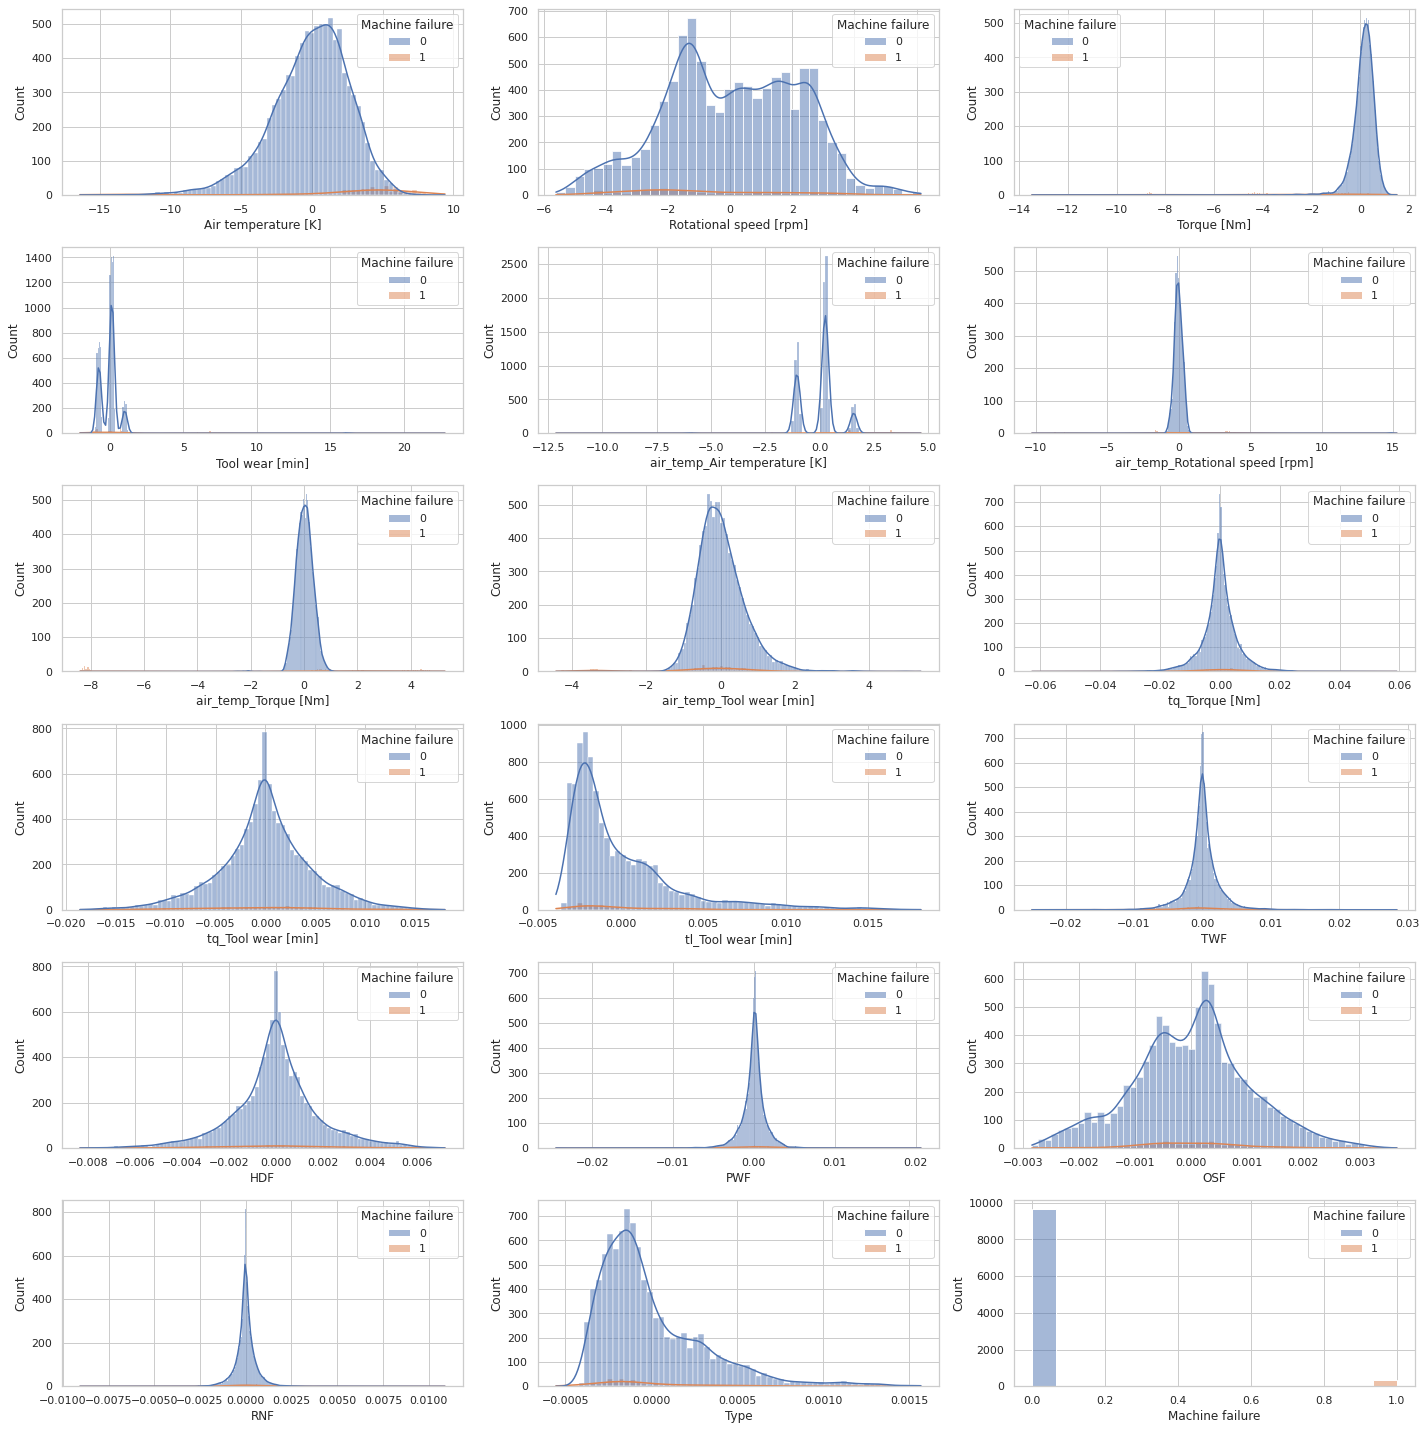

In [335]:
#plotting histogram to understand individiual variable distribution
import seaborn as sns
sns.set(style="whitegrid")
fig,axs = plt.subplots(6,3, figsize = (20,20))
sns.histplot(data=PCA_dropped_viz, x="Air temperature [K]", kde=True, hue='Machine failure', ax=axs[0, 0])
sns.histplot(data=PCA_dropped_viz, x="Rotational speed [rpm]", kde=True, hue='Machine failure', ax=axs[0, 1])
sns.histplot(data=PCA_dropped_viz, x="Torque [Nm]", kde=True, hue='Machine failure', ax=axs[0, 2])
sns.histplot(data=PCA_dropped_viz, x="Tool wear [min]", kde=True, hue='Machine failure', ax=axs[1, 0])
sns.histplot(data=PCA_dropped_viz, x="air_temp_Air temperature [K]", kde=True, hue='Machine failure', ax=axs[1, 1])
sns.histplot(data=PCA_dropped_viz, x="air_temp_Rotational speed [rpm]", kde=True, hue='Machine failure', ax=axs[1, 2])
sns.histplot(data=PCA_dropped_viz, x="air_temp_Torque [Nm]", kde=True, hue='Machine failure', ax=axs[2, 0])
sns.histplot(data=PCA_dropped_viz, x="air_temp_Tool wear [min]", kde=True, hue='Machine failure', ax=axs[2, 1])
sns.histplot(data=PCA_dropped_viz, x="tq_Torque [Nm]", kde=True, hue='Machine failure', ax=axs[2, 2])
sns.histplot(data=PCA_dropped_viz, x="tq_Tool wear [min]", kde=True, hue='Machine failure', ax=axs[3, 0])
sns.histplot(data=PCA_dropped_viz, x="tl_Tool wear [min]", kde=True, hue='Machine failure', ax=axs[3, 1])
sns.histplot(data=PCA_dropped_viz, x="TWF", kde=True, hue='Machine failure', ax=axs[3, 2])
sns.histplot(data=PCA_dropped_viz, x="HDF", kde=True, hue='Machine failure', ax=axs[4, 0])
sns.histplot(data=PCA_dropped_viz, x="PWF", kde=True, hue='Machine failure', ax=axs[4, 1])
sns.histplot(data=PCA_dropped_viz, x="OSF", kde=True, hue='Machine failure', ax=axs[4, 2])
sns.histplot(data=PCA_dropped_viz, x="RNF", kde=True, hue='Machine failure', ax=axs[5, 0])
sns.histplot(data=PCA_dropped_viz, x="Type", kde=True, hue='Machine failure', ax=axs[5, 1])
sns.histplot(data=PCA_dropped_viz, x="Machine failure", kde=True, hue='Machine failure', ax=axs[5, 2])
fig.tight_layout()

# (B) Pair Plot Feature Engineering

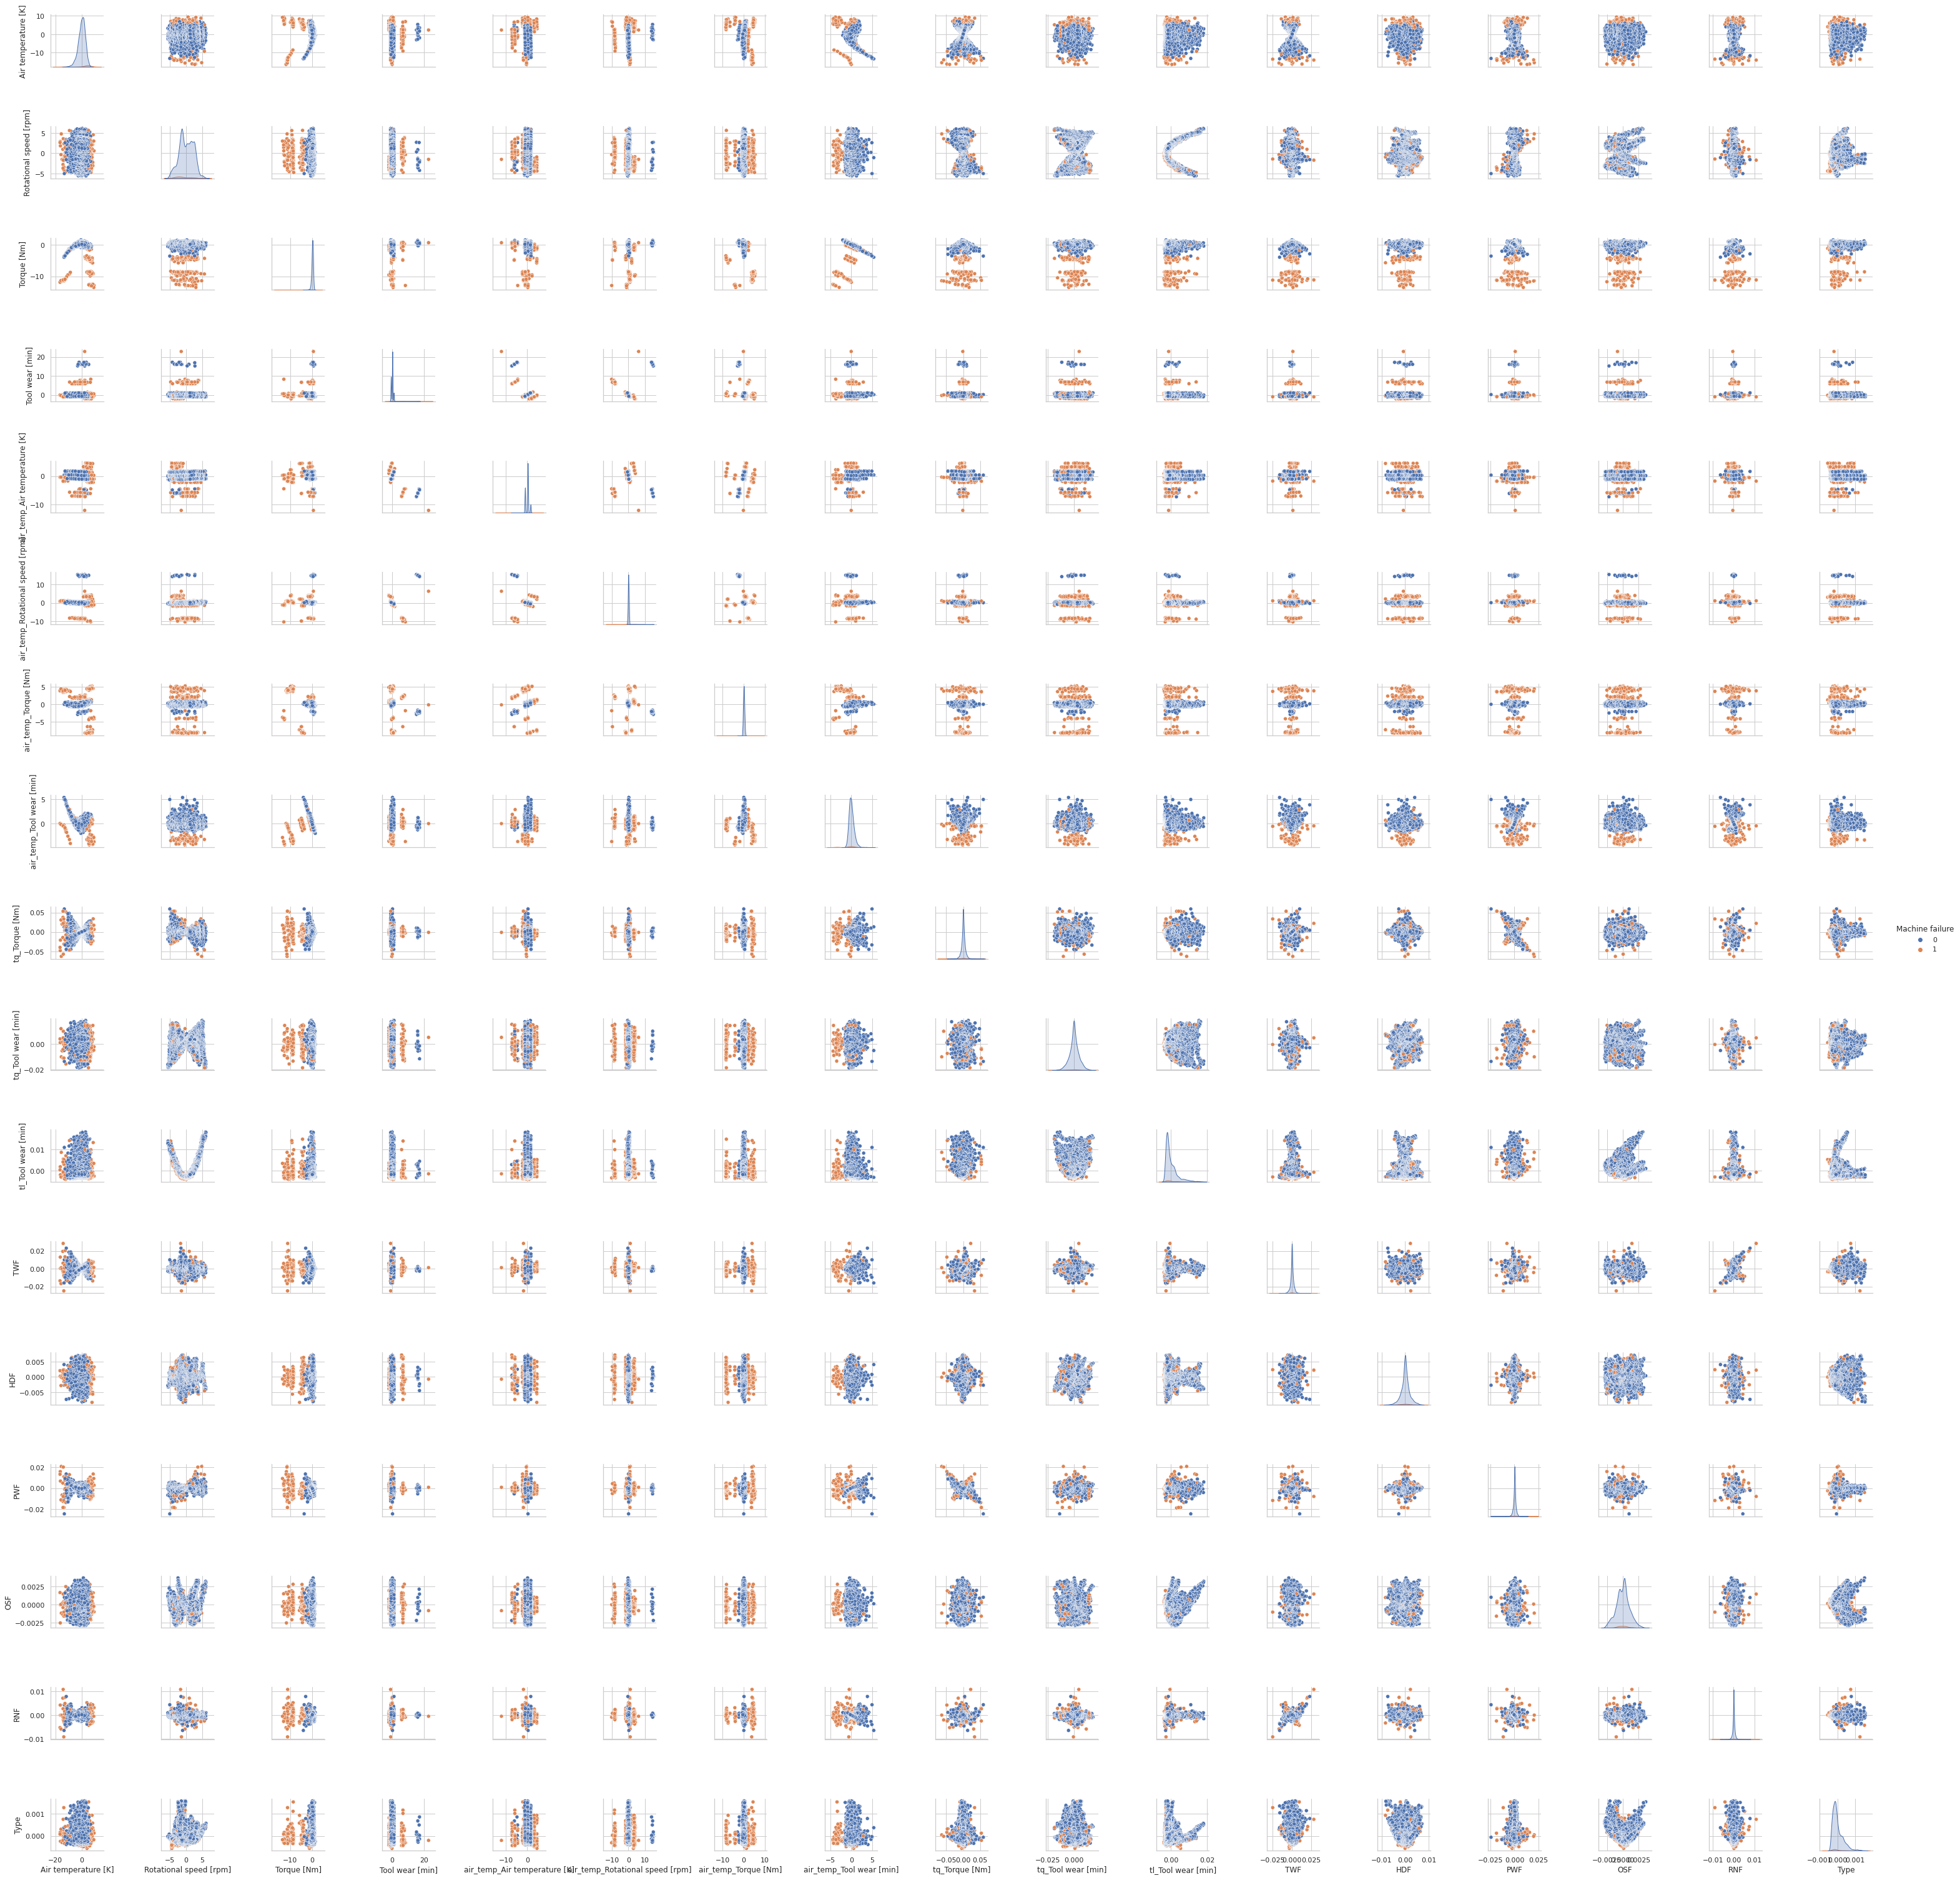

In [362]:
#plotting a scatterplot matrix on the original raw data frame
import seaborn as sns

sns.pairplot(PCA_dropped_viz, hue='Machine failure')



# (C) Violin Plot Feature Engineering

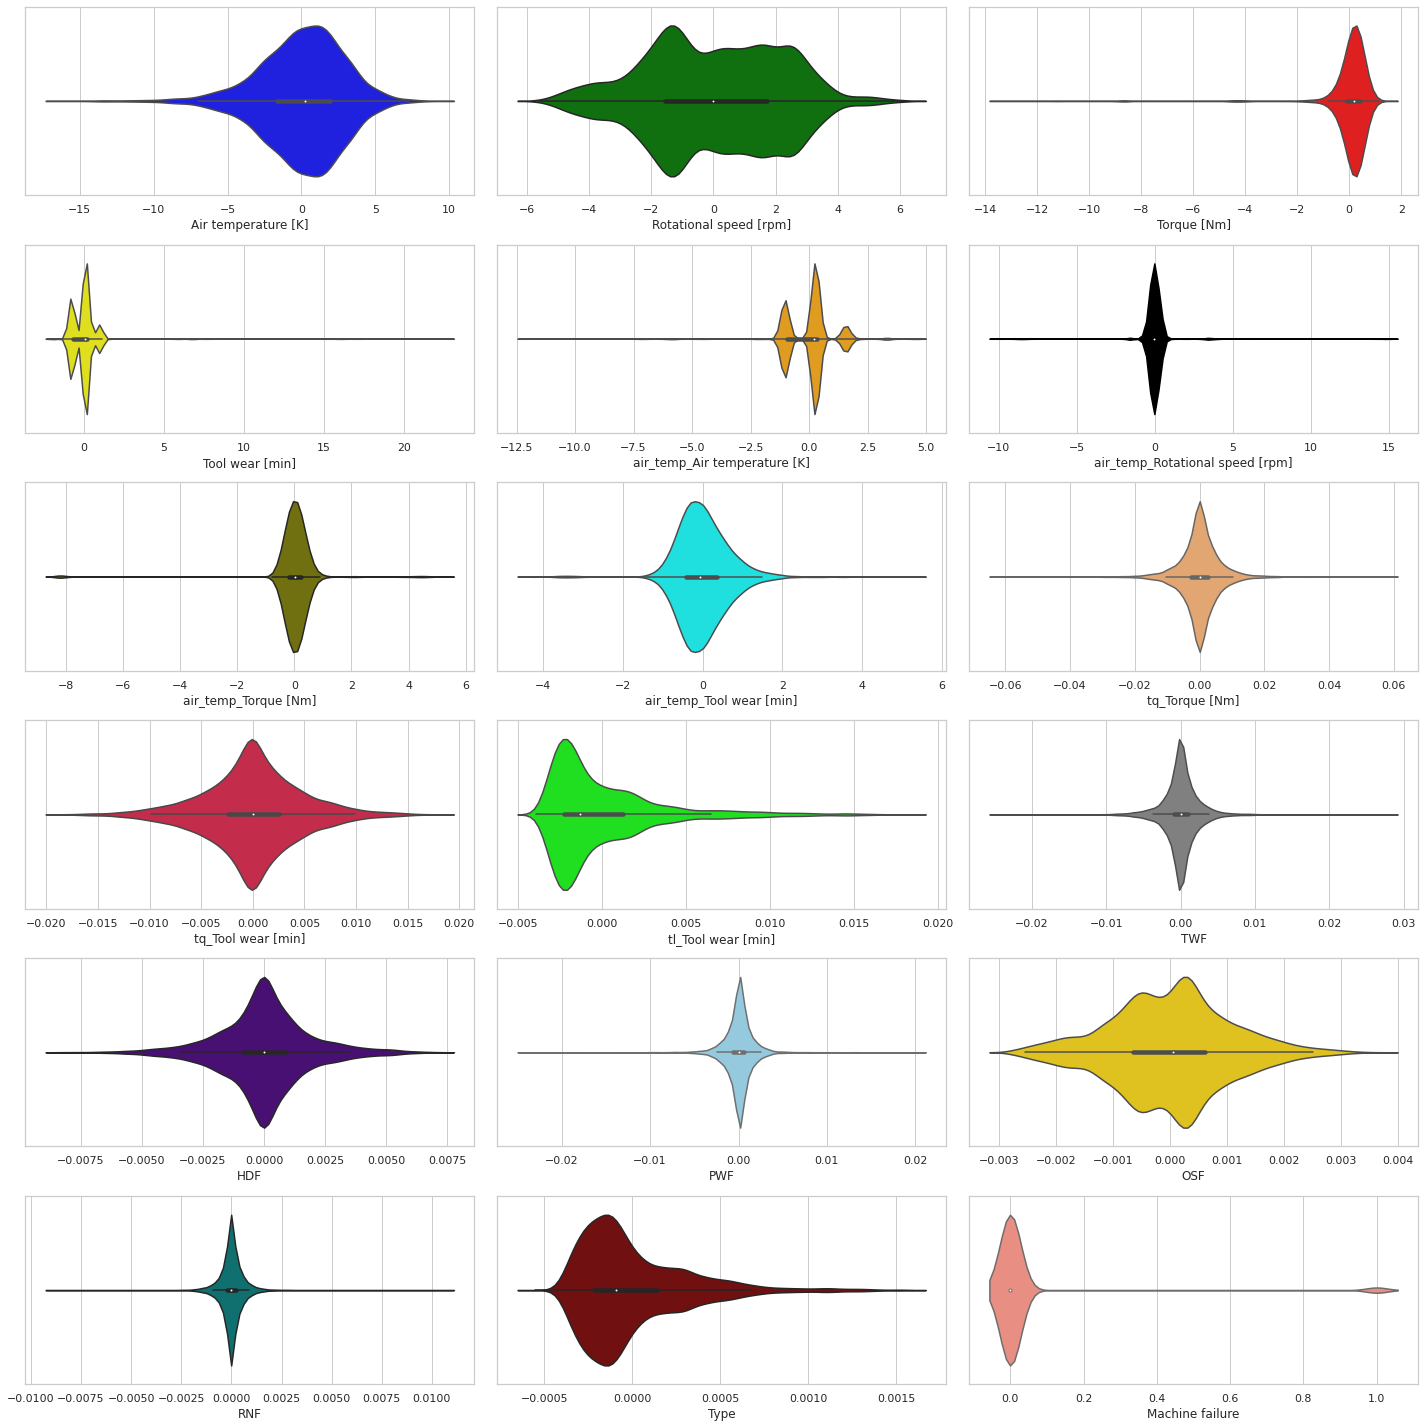

In [363]:
#plotting Violinplot to understand individiual variable distribution
import seaborn as sns
sns.set(style="whitegrid")
fig,axs = plt.subplots(6,3, figsize = (20,20))
sns.violinplot(data=PCA_dropped_viz, x="Air temperature [K]", kde=True, hue='Machine failure', ax=axs[0, 0], color = 'blue')
sns.violinplot(data=PCA_dropped_viz, x="Rotational speed [rpm]", kde=True, hue='Machine failure', ax=axs[0, 1], color = 'green')
sns.violinplot(data=PCA_dropped_viz, x="Torque [Nm]", kde=True, hue='Machine failure', ax=axs[0, 2], color = 'red')
sns.violinplot(data=PCA_dropped_viz, x="Tool wear [min]", kde=True, hue='Machine failure', ax=axs[1, 0], color = 'yellow')
sns.violinplot(data=PCA_dropped_viz, x="air_temp_Air temperature [K]", kde=True, hue='Machine failure', ax=axs[1, 1], color = 'orange')
sns.violinplot(data=PCA_dropped_viz, x="air_temp_Rotational speed [rpm]", kde=True, hue='Machine failure', ax=axs[1, 2], color = 'black')
sns.violinplot(data=PCA_dropped_viz, x="air_temp_Torque [Nm]", kde=True, hue='Machine failure', ax=axs[2, 0], color = 'olive')
sns.violinplot(data=PCA_dropped_viz, x="air_temp_Tool wear [min]", kde=True, hue='Machine failure', ax=axs[2, 1], color = 'cyan')
sns.violinplot(data=PCA_dropped_viz, x="tq_Torque [Nm]", kde=True, hue='Machine failure', ax=axs[2, 2], color = 'sandybrown')
sns.violinplot(data=PCA_dropped_viz, x="tq_Tool wear [min]", kde=True, hue='Machine failure', ax=axs[3, 0], color = 'crimson')
sns.violinplot(data=PCA_dropped_viz, x="tl_Tool wear [min]", kde=True, hue='Machine failure', ax=axs[3, 1], color = 'lime')
sns.violinplot(data=PCA_dropped_viz, x="TWF", kde=True, hue='Machine failure', ax=axs[3, 2], color = 'gray')
sns.violinplot(data=PCA_dropped_viz, x="HDF", kde=True, hue='Machine failure', ax=axs[4, 0], color = 'indigo')
sns.violinplot(data=PCA_dropped_viz, x="PWF", kde=True, hue='Machine failure', ax=axs[4, 1], color = 'skyblue')
sns.violinplot(data=PCA_dropped_viz, x="OSF", kde=True, hue='Machine failure', ax=axs[4, 2], color = 'gold')
sns.violinplot(data=PCA_dropped_viz, x="RNF", kde=True, hue='Machine failure', ax=axs[5, 0], color = 'teal')
sns.violinplot(data=PCA_dropped_viz, x="Type", kde=True, hue='Machine failure', ax=axs[5, 1], color = 'maroon')
sns.violinplot(data=PCA_dropped_viz, x="Machine failure", kde=True, hue='Machine failure', ax=axs[5, 2], color = 'salmon')
fig.tight_layout()

#(D) Box Plot Feature Engineering (With Outliers)

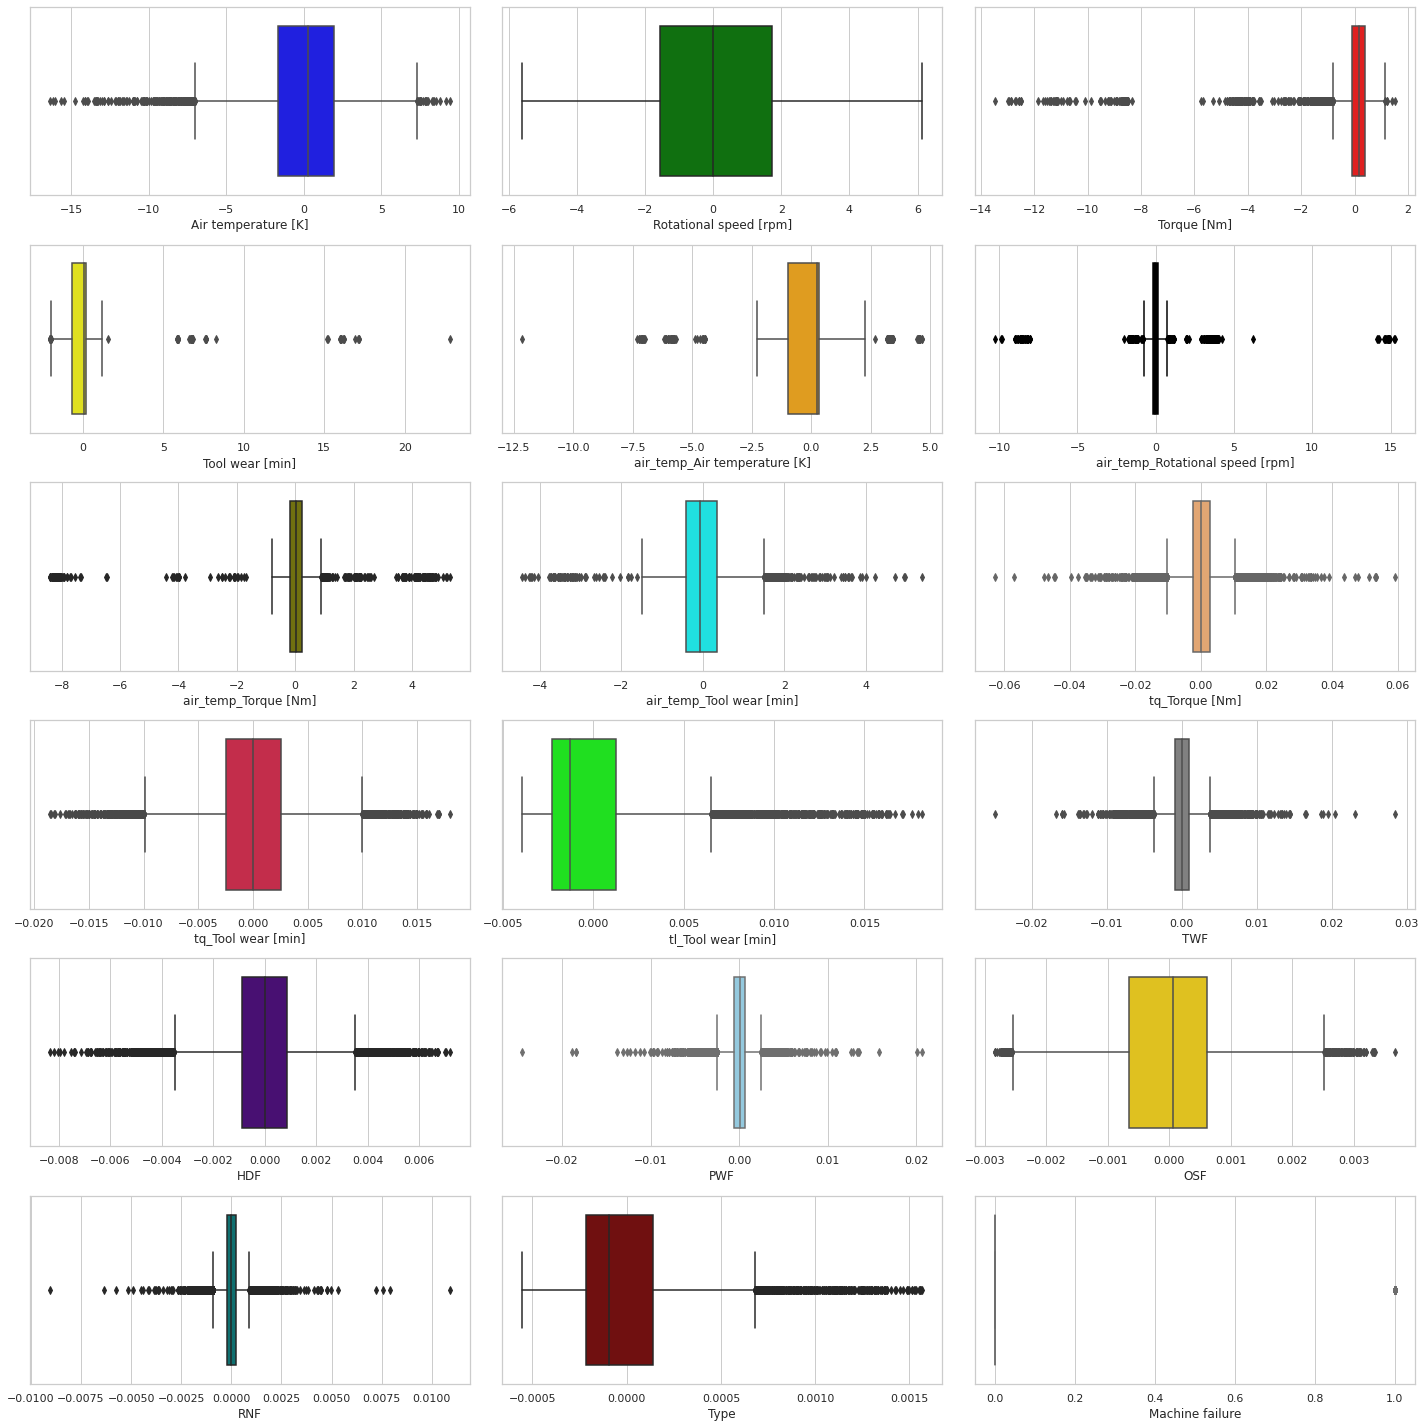

In [364]:
#plotting Box Plot to understand individiual variable distribution
import seaborn as sns
sns.set(style="whitegrid")
fig,axs = plt.subplots(6,3, figsize = (20,20))
sns.boxplot(data=PCA_dropped_viz, x="Air temperature [K]", hue='Machine failure', ax=axs[0, 0], color = 'blue')
sns.boxplot(data=PCA_dropped_viz, x="Rotational speed [rpm]", hue='Machine failure', ax=axs[0, 1], color = 'green')
sns.boxplot(data=PCA_dropped_viz, x="Torque [Nm]", hue='Machine failure', ax=axs[0, 2], color = 'red')
sns.boxplot(data=PCA_dropped_viz, x="Tool wear [min]", hue='Machine failure', ax=axs[1, 0], color = 'yellow')
sns.boxplot(data=PCA_dropped_viz, x="air_temp_Air temperature [K]", hue='Machine failure', ax=axs[1, 1], color = 'orange')
sns.boxplot(data=PCA_dropped_viz, x="air_temp_Rotational speed [rpm]", hue='Machine failure', ax=axs[1, 2], color = 'black')
sns.boxplot(data=PCA_dropped_viz, x="air_temp_Torque [Nm]", hue='Machine failure', ax=axs[2, 0], color = 'olive')
sns.boxplot(data=PCA_dropped_viz, x="air_temp_Tool wear [min]", hue='Machine failure', ax=axs[2, 1], color = 'cyan')
sns.boxplot(data=PCA_dropped_viz, x="tq_Torque [Nm]", hue='Machine failure', ax=axs[2, 2], color = 'sandybrown')
sns.boxplot(data=PCA_dropped_viz, x="tq_Tool wear [min]", hue='Machine failure', ax=axs[3, 0], color = 'crimson')
sns.boxplot(data=PCA_dropped_viz, x="tl_Tool wear [min]", hue='Machine failure', ax=axs[3, 1], color = 'lime')
sns.boxplot(data=PCA_dropped_viz, x="TWF", hue='Machine failure', ax=axs[3, 2], color = 'gray')
sns.boxplot(data=PCA_dropped_viz, x="HDF", hue='Machine failure', ax=axs[4, 0], color = 'indigo')
sns.boxplot(data=PCA_dropped_viz, x="PWF", hue='Machine failure', ax=axs[4, 1], color = 'skyblue')
sns.boxplot(data=PCA_dropped_viz, x="OSF", hue='Machine failure', ax=axs[4, 2], color = 'gold')
sns.boxplot(data=PCA_dropped_viz, x="RNF", hue='Machine failure', ax=axs[5, 0], color = 'teal')
sns.boxplot(data=PCA_dropped_viz, x="Type", hue='Machine failure', ax=axs[5, 1], color = 'maroon')
sns.boxplot(data=PCA_dropped_viz, x="Machine failure", hue='Machine failure', ax=axs[5, 2], color = 'salmon')
fig.tight_layout()

# (E) Box Plot Feature Engineering (Without Outliers)

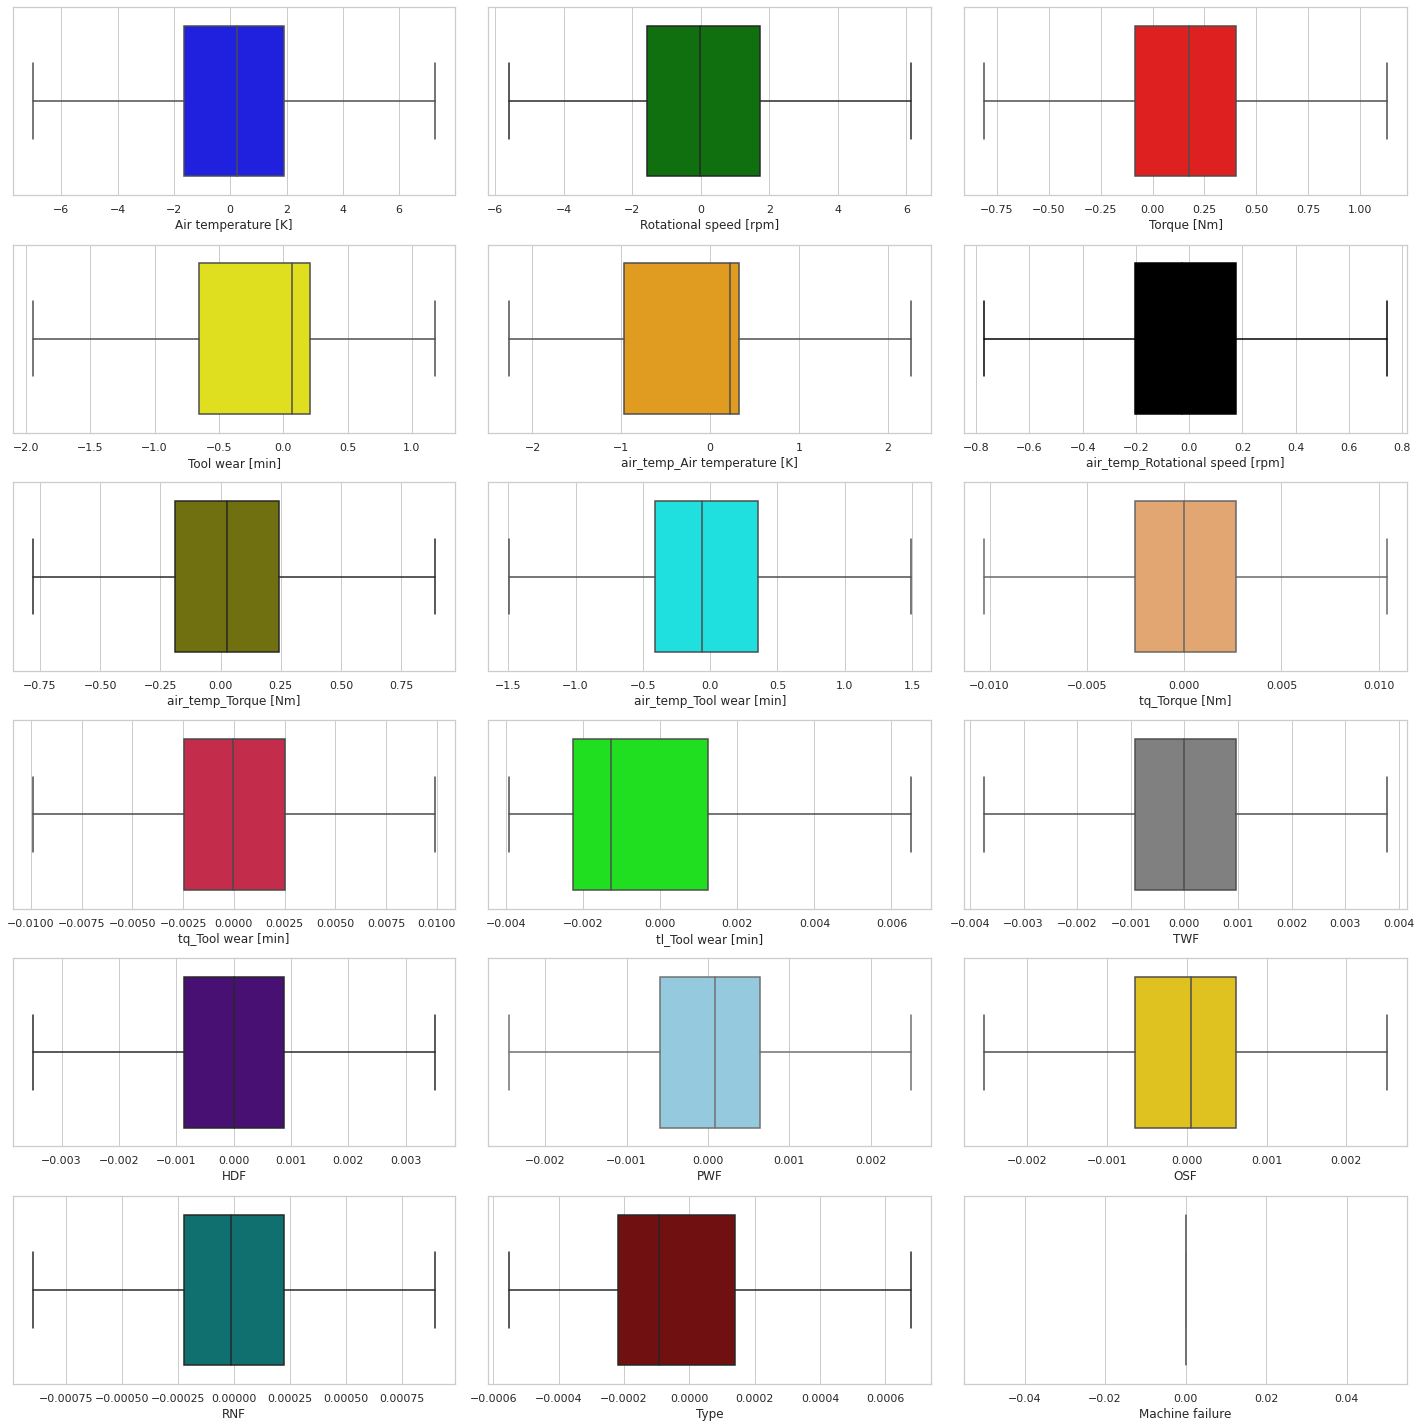

In [365]:
#plotting Box Plot to understand individiual variable distribution
import seaborn as sns
sns.set(style="whitegrid")
fig,axs = plt.subplots(6,3, figsize = (20,20))
sns.boxplot(data=PCA_dropped_viz, x="Air temperature [K]", hue='Machine failure', ax=axs[0, 0], color = 'blue', showfliers = False)
sns.boxplot(data=PCA_dropped_viz, x="Rotational speed [rpm]", hue='Machine failure', ax=axs[0, 1], color = 'green', showfliers = False)
sns.boxplot(data=PCA_dropped_viz, x="Torque [Nm]", hue='Machine failure', ax=axs[0, 2], color = 'red', showfliers = False)
sns.boxplot(data=PCA_dropped_viz, x="Tool wear [min]", hue='Machine failure', ax=axs[1, 0], color = 'yellow', showfliers = False)
sns.boxplot(data=PCA_dropped_viz, x="air_temp_Air temperature [K]", hue='Machine failure', ax=axs[1, 1], color = 'orange', showfliers = False)
sns.boxplot(data=PCA_dropped_viz, x="air_temp_Rotational speed [rpm]", hue='Machine failure', ax=axs[1, 2], color = 'black', showfliers = False)
sns.boxplot(data=PCA_dropped_viz, x="air_temp_Torque [Nm]", hue='Machine failure', ax=axs[2, 0], color = 'olive', showfliers = False)
sns.boxplot(data=PCA_dropped_viz, x="air_temp_Tool wear [min]", hue='Machine failure', ax=axs[2, 1], color = 'cyan', showfliers = False)
sns.boxplot(data=PCA_dropped_viz, x="tq_Torque [Nm]", hue='Machine failure', ax=axs[2, 2], color = 'sandybrown', showfliers = False)
sns.boxplot(data=PCA_dropped_viz, x="tq_Tool wear [min]", hue='Machine failure', ax=axs[3, 0], color = 'crimson', showfliers = False)
sns.boxplot(data=PCA_dropped_viz, x="tl_Tool wear [min]", hue='Machine failure', ax=axs[3, 1], color = 'lime', showfliers = False)
sns.boxplot(data=PCA_dropped_viz, x="TWF", hue='Machine failure', ax=axs[3, 2], color = 'gray', showfliers = False)
sns.boxplot(data=PCA_dropped_viz, x="HDF", hue='Machine failure', ax=axs[4, 0], color = 'indigo', showfliers = False)
sns.boxplot(data=PCA_dropped_viz, x="PWF", hue='Machine failure', ax=axs[4, 1], color = 'skyblue', showfliers = False)
sns.boxplot(data=PCA_dropped_viz, x="OSF", hue='Machine failure', ax=axs[4, 2], color = 'gold', showfliers = False)
sns.boxplot(data=PCA_dropped_viz, x="RNF", hue='Machine failure', ax=axs[5, 0], color = 'teal', showfliers = False)
sns.boxplot(data=PCA_dropped_viz, x="Type", hue='Machine failure', ax=axs[5, 1], color = 'maroon', showfliers = False)
sns.boxplot(data=PCA_dropped_viz, x="Machine failure", hue='Machine failure', ax=axs[5, 2], color = 'salmon', showfliers = False)
fig.tight_layout()

# (G) Heatmap Feature Engineering

In [366]:
PCA_dropped_viz_hm =PCA_dropped_viz.drop('Machine failure',axis=1)

Text(0.5, 1.0, 'Correlation Heatmap')

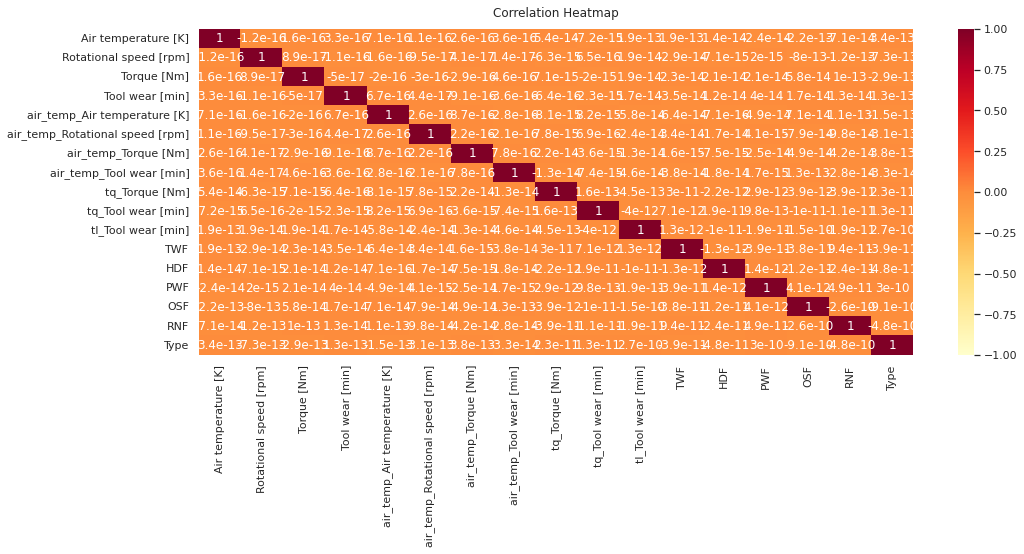

In [367]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(PCA_dropped_viz_hm.corr(), vmin=-1, vmax=1, annot=True, cmap='YlOrRd')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12},pad= 12)